# Excercise Analysis PCA
Author:  Ricardo Vallejo
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

# 1. LOAD DATA

In [3]:
# charger les données
data = pd.read_csv("skin.csv", delimiter=";", decimal = ",")
# faire une copie
df = data.copy()
df.head()

,AGE,Age_BIN,Ville,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,...,Paup_ITA,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur
0,25,L,Europe,71541.0,1.8669,5.6292,103.5,12.5397,8.9513,5.4579,...,44.7492,75.1704,7.1162,2.5630,5.9539,203.0,15.1434,9.3552,424069.5,446.5085
1,28,L,Europe,89193.5,4.2191,5.9259,96.5,11.7330,11.8962,4.2646,...,0.5550,61.7410,6.6843,10.8779,6.8301,210.0,16.9882,14.9127,493232.0,496.9325
2,57,H,Europe,44993.5,2.1424,5.3528,100.0,9.0888,7.7184,4.0401,...,42.4604,72.9530,7.6134,5.0513,6.2248,163.0,13.6760,11.7784,380649.0,427.0025
3,23,L,Europe,37159.5,3.3100,5.9635,112.0,12.3705,14.4397,3.8183,...,37.2925,73.6508,7.8988,7.6544,6.5372,215.0,18.0385,9.2540,442697.0,459.0190
4,55,H,Europe,182202.5,3.8090,6.0859,104.5,12.0235,10.8535,5.8068,...,27.0483,69.4875,8.9338,6.8041,6.5861,203.5,16.2301,10.6475,396187.0,433.7800


# 2. DATA DESCRIPTION

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGE                       250 non-null    int64  
 1   Age_BIN                   250 non-null    object 
 2   Ville                     250 non-null    object 
 3   Cerne_Surface             250 non-null    float64
 4   Cerne_Haralick_Contraste  250 non-null    float64
 5   Cerne_Haralick_Entropie   250 non-null    float64
 6   Cerne_Rugosite_Rt         250 non-null    float64
 7   Cerne_Rugosite_Ra         250 non-null    float64
 8   Cerne_Orientation_Aniso   250 non-null    float64
 9   Cerne_H76                 250 non-null    float64
 10  Cerne_Contraste_dL        250 non-null    float64
 11  Cerne_Contraste_da        250 non-null    float64
 12  Cerne_Contraste_db        250 non-null    float64
 13  Cerne_Contraste_dC        250 non-null    float64
 14  Cerne_Cont

In [92]:
# mettre la série Fromages en index
#df = df.set_index("Fromages")


In [5]:
df.describe()

,AGE,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,Cerne_Contraste_da,...,Paup_ITA,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,41.612000,62661.69400,4.584012,5.922986,112.294000,10.814892,10.960717,3.980804,11.915450,2.248866,...,19.141144,64.187520,7.303804,8.379439,6.533367,206.712000,16.777278,13.115893,396497.490000,414.554382
std,17.313941,48709.30859,1.640141,0.494417,21.092276,2.832262,2.280059,1.869707,6.061585,1.870576,...,13.748460,6.163550,1.152158,2.704151,0.268088,12.751922,2.602275,2.927677,64067.297357,51.552145
min,20.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-22.592300,49.912000,4.500200,2.563000,5.896400,163.000000,9.508200,7.697800,212815.500000,249.881000
25%,24.000000,29607.12500,3.455975,5.705850,100.125000,8.979950,9.385375,3.412575,9.737825,0.857500,...,9.797175,59.598325,6.608350,6.334075,6.328675,197.750000,15.180575,11.054225,349766.250000,377.260000
50%,30.000000,53542.00000,4.262500,5.957850,112.000000,10.366200,10.596800,4.277750,12.649850,1.819100,...,17.742100,63.934250,7.360900,7.917600,6.563950,208.250000,16.905200,12.701100,394853.750000,415.557750
75%,59.000000,87572.87500,5.298275,6.153525,125.500000,12.404375,12.069475,5.255725,15.888150,3.240425,...,27.988200,68.871275,7.911400,10.110500,6.720375,217.000000,18.552750,14.934300,439895.875000,446.321125
max,65.000000,233399.00000,10.713300,6.803700,175.500000,21.060100,19.522700,7.256700,27.309700,8.625100,...,59.860600,78.753100,10.528300,22.590400,7.146000,236.000000,24.791800,21.803400,542687.000000,549.563000


# Identification des outliers

In [14]:
cols_model = df.columns[3:]

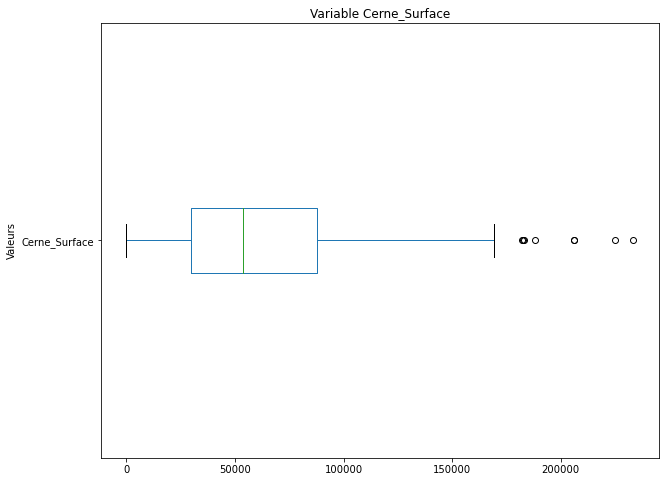

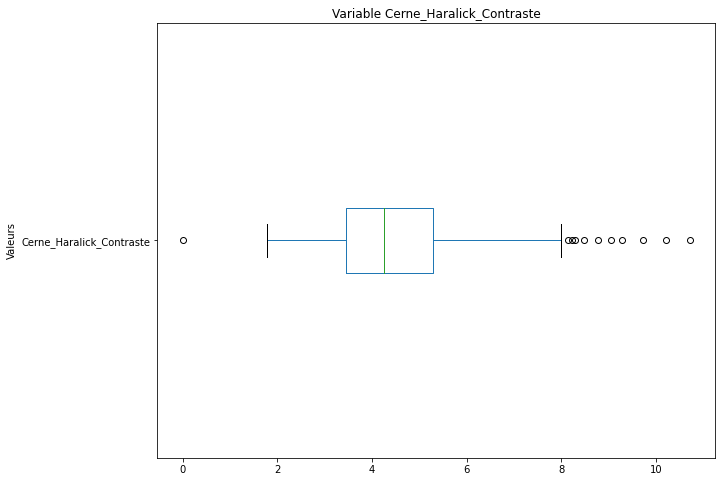

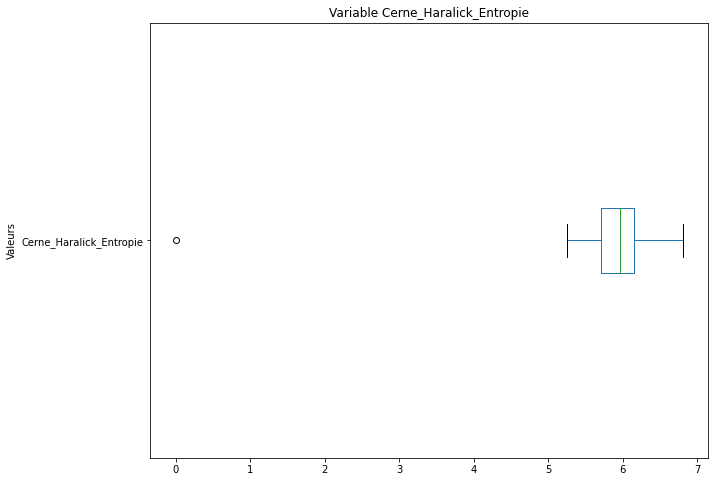

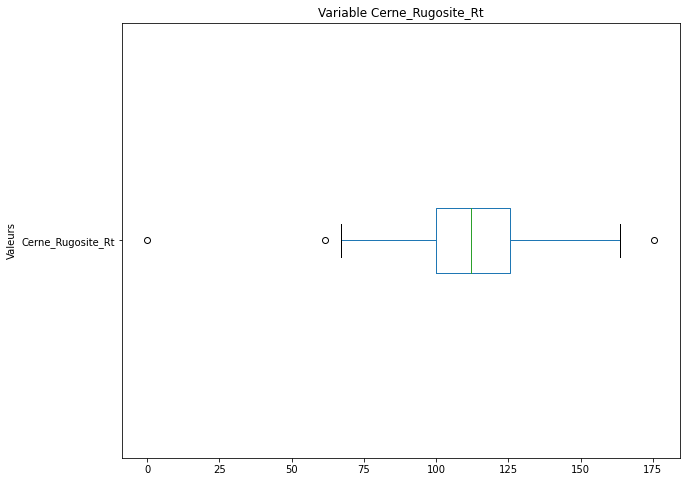

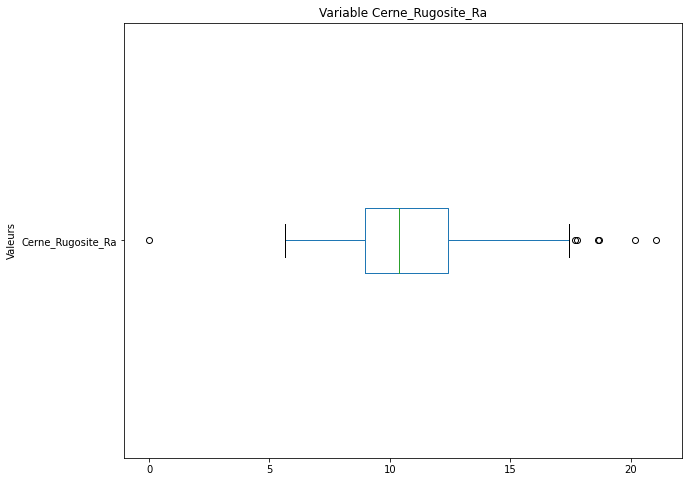

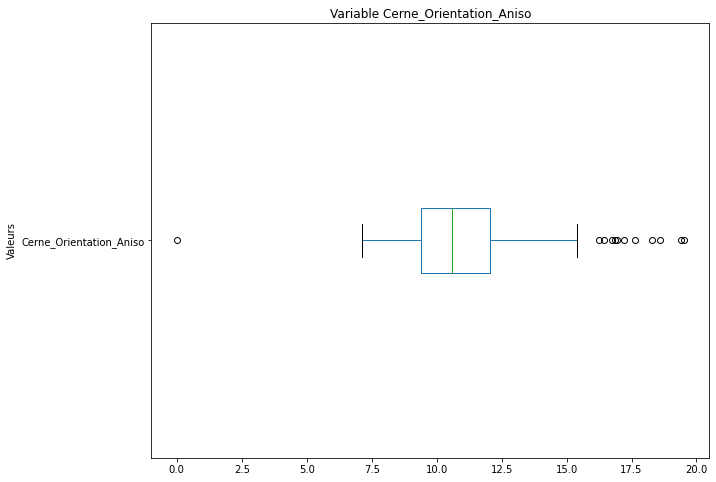

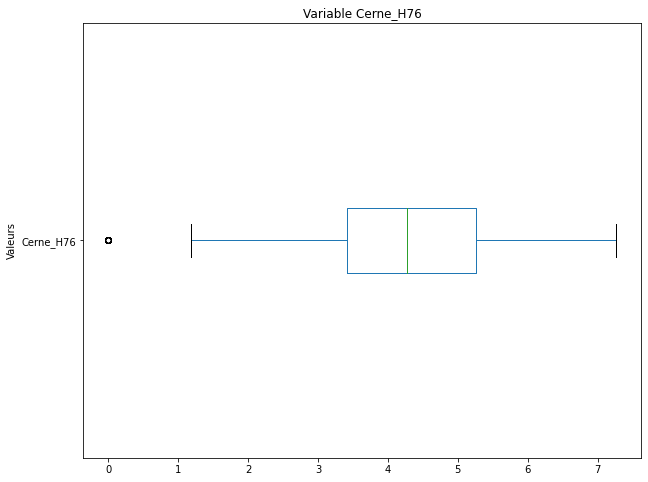

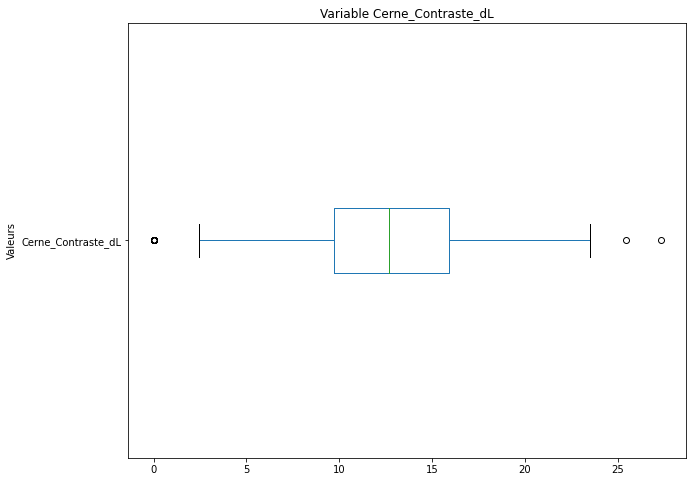

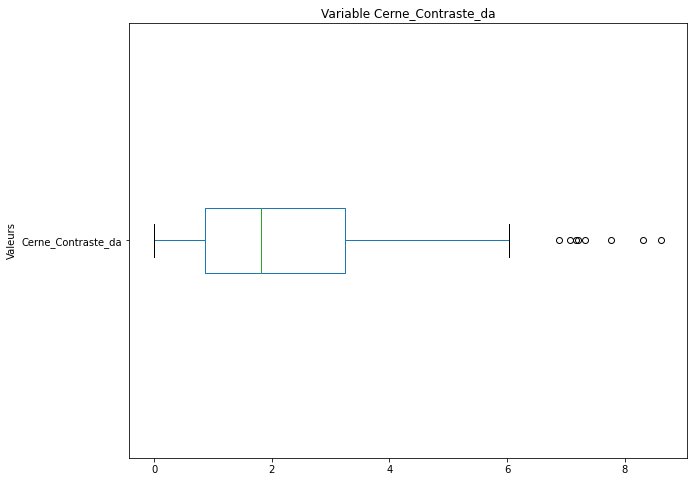

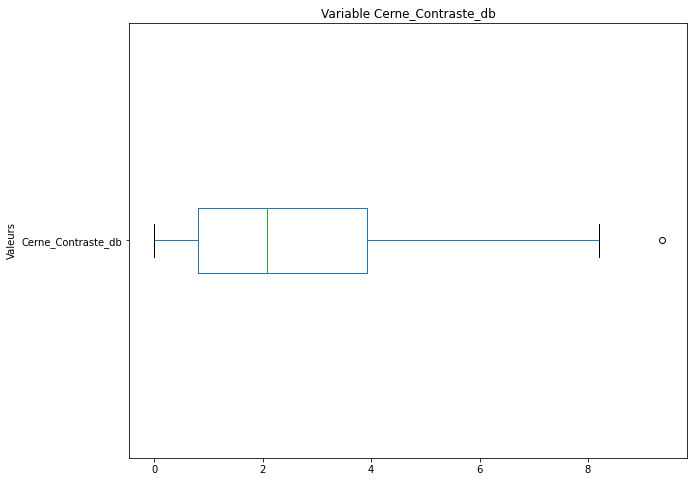

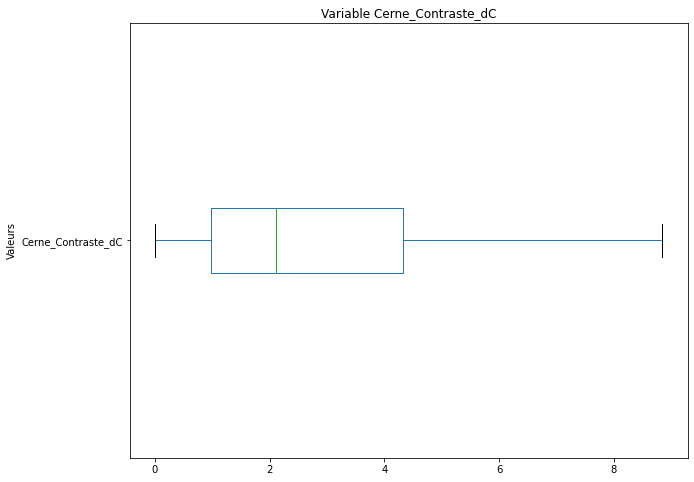

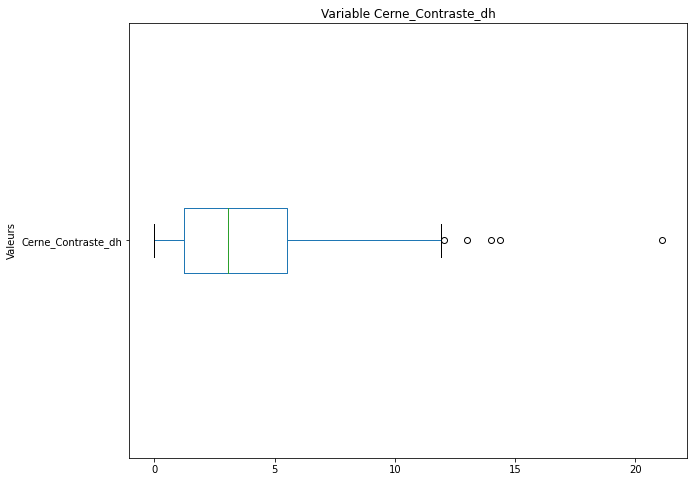

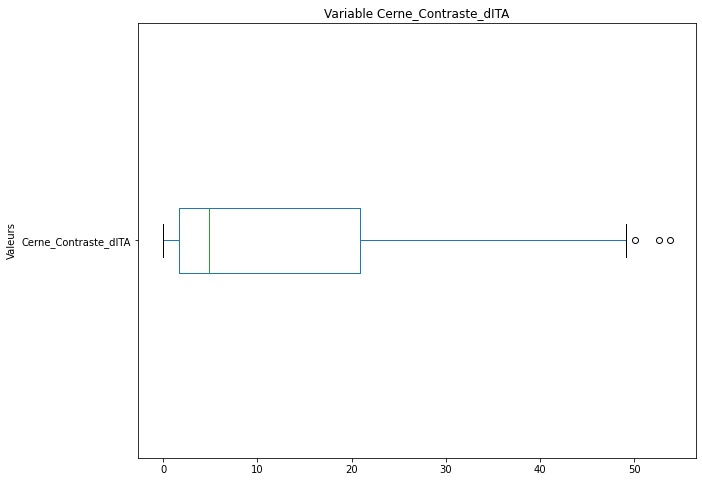

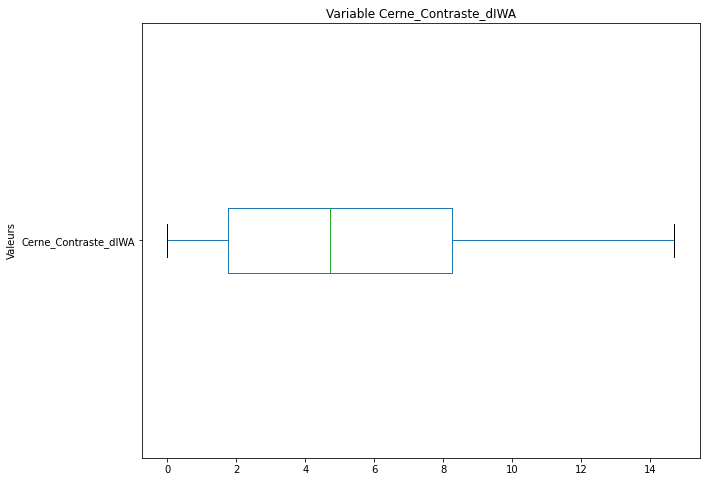

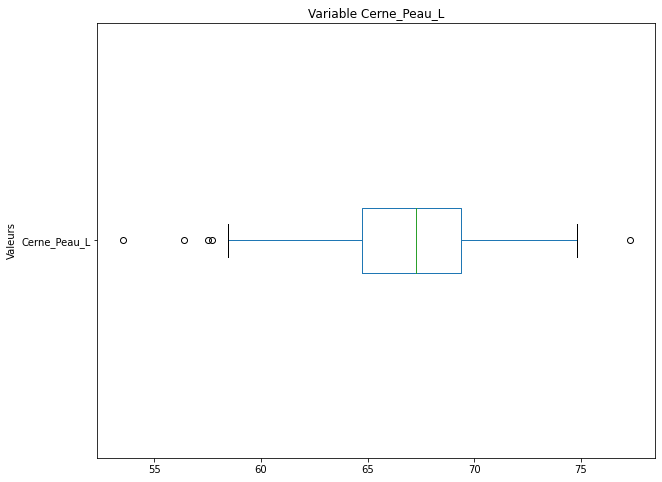

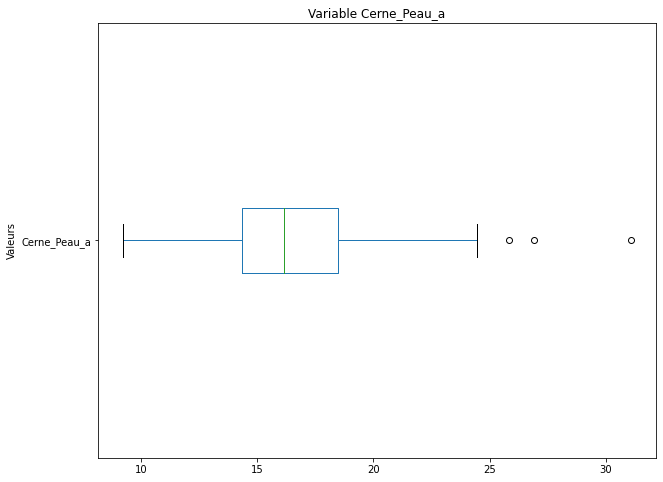

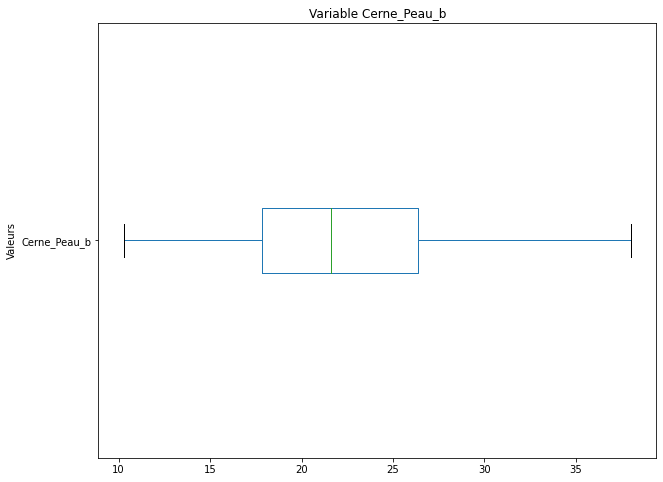

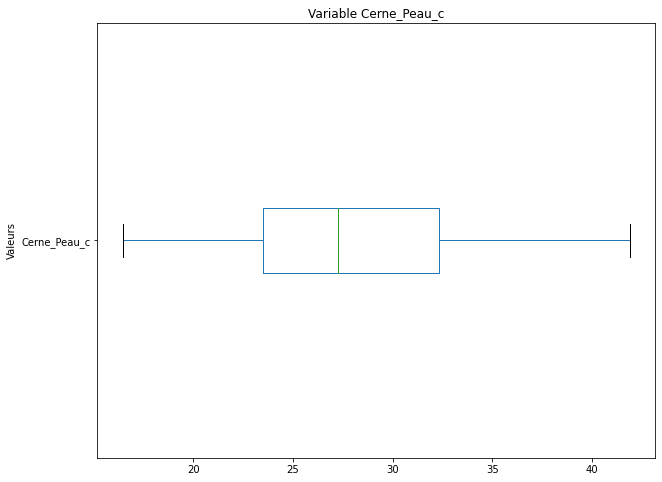

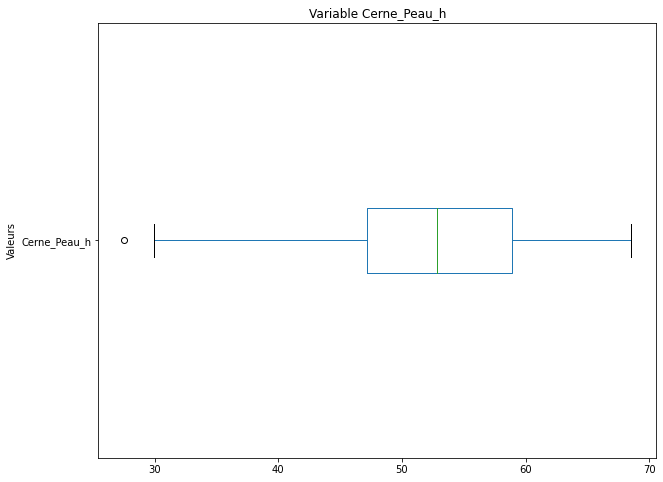

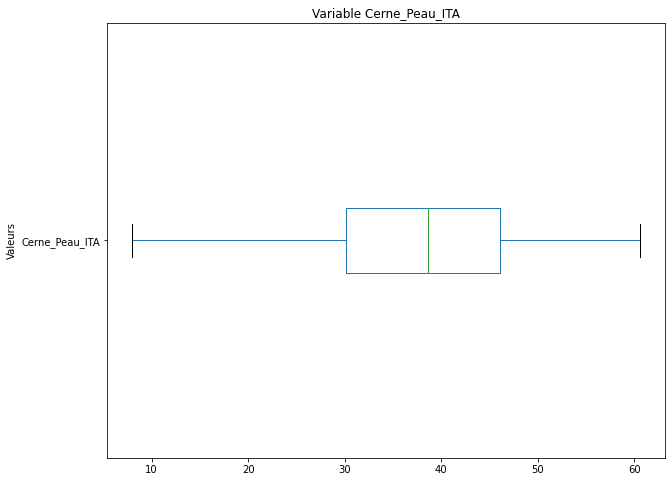

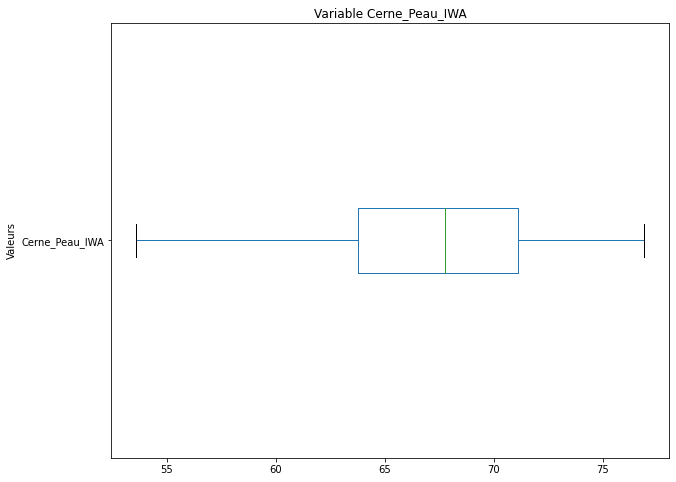

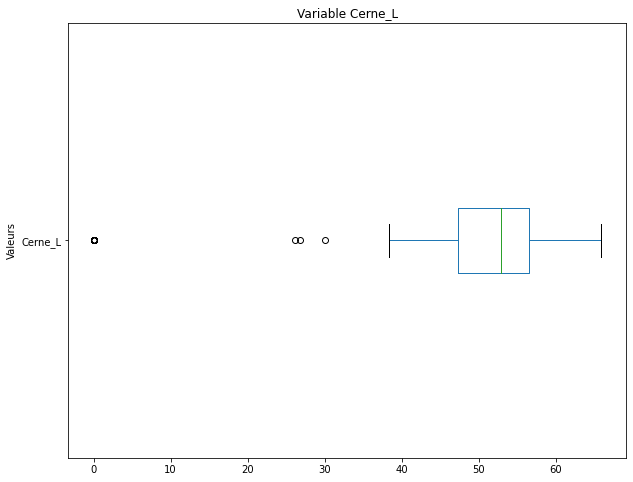

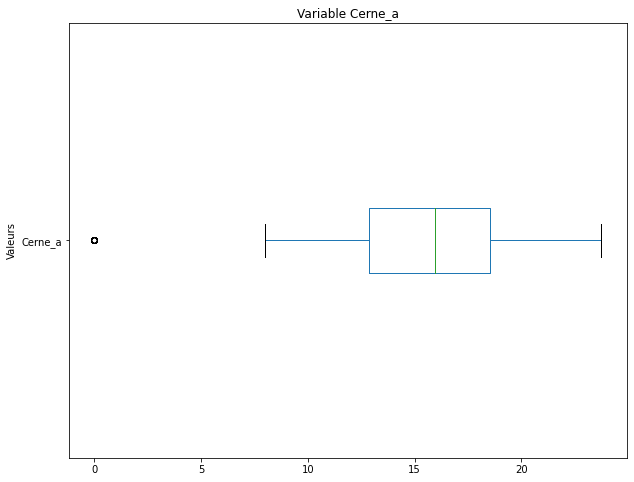

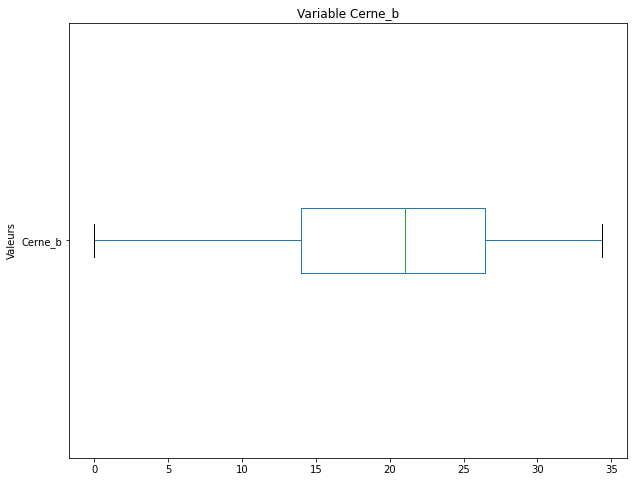

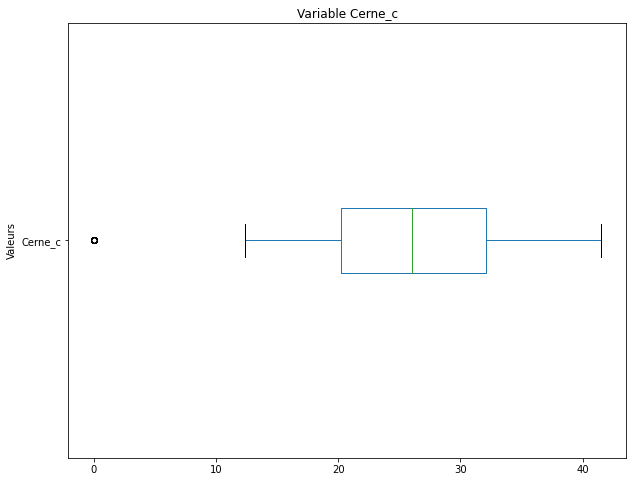

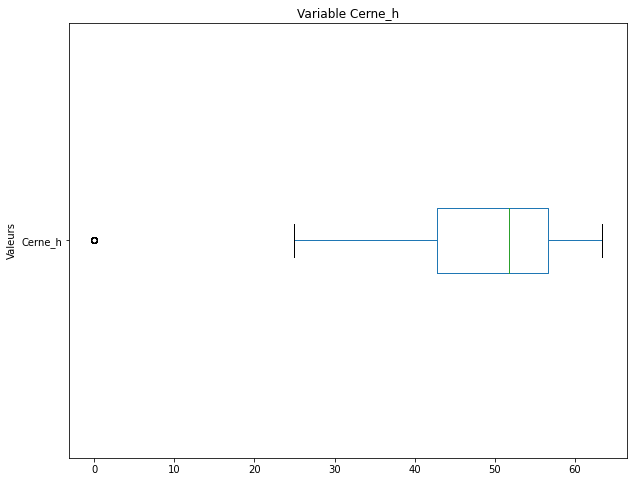

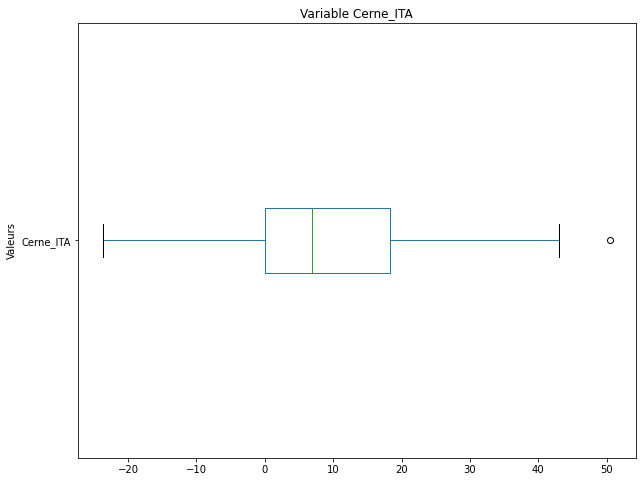

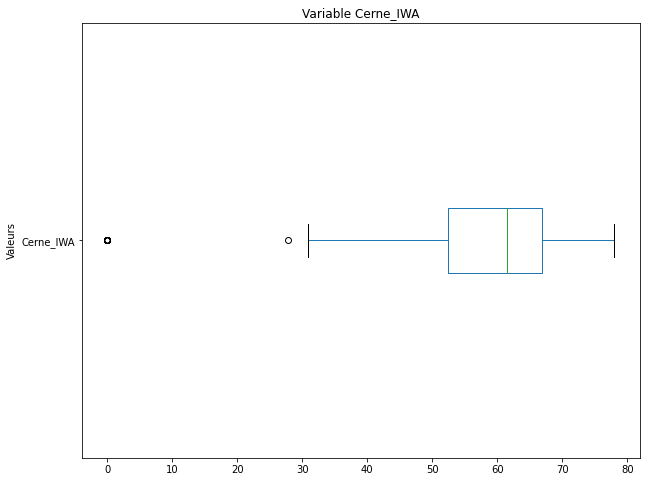

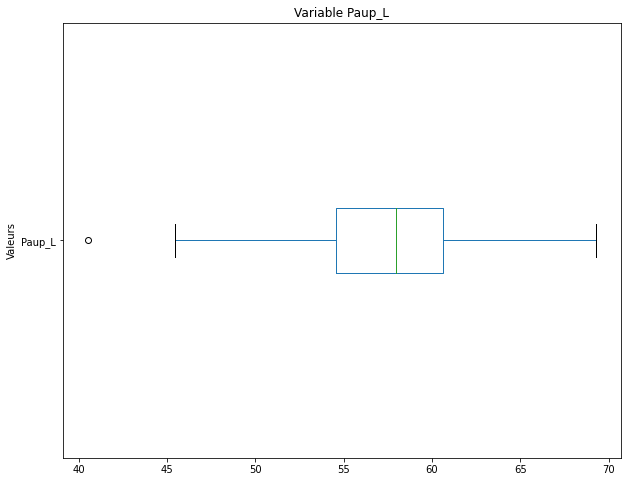

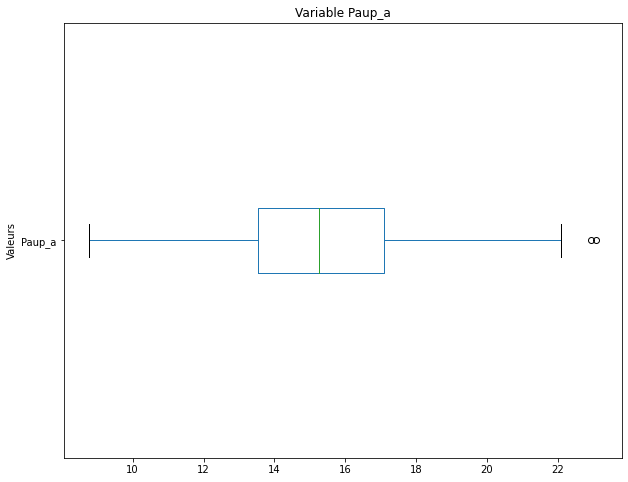

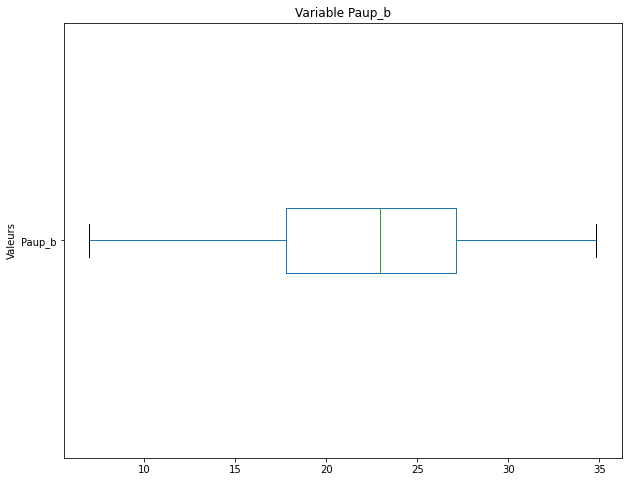

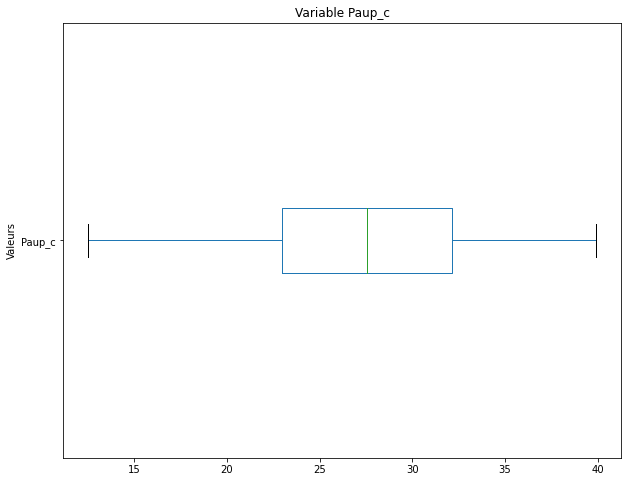

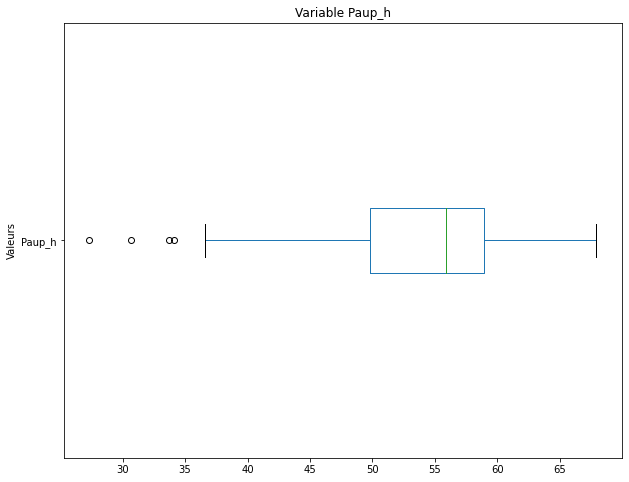

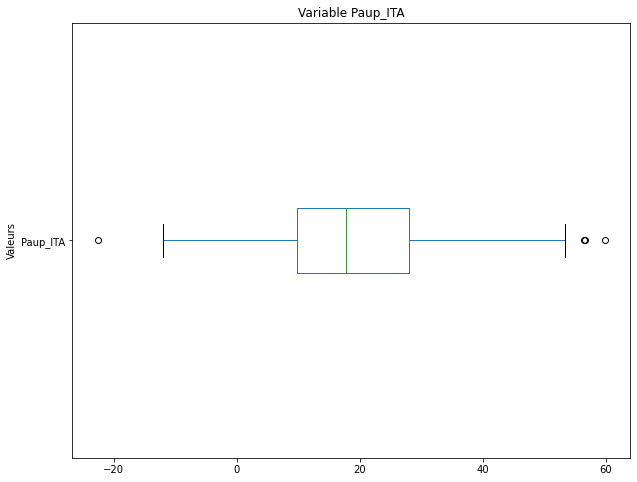

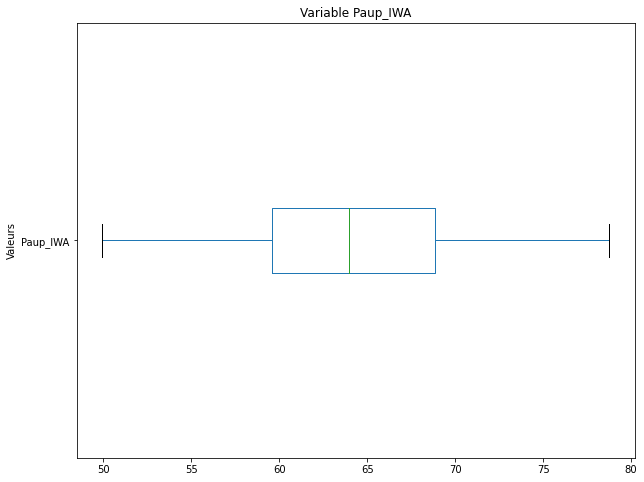

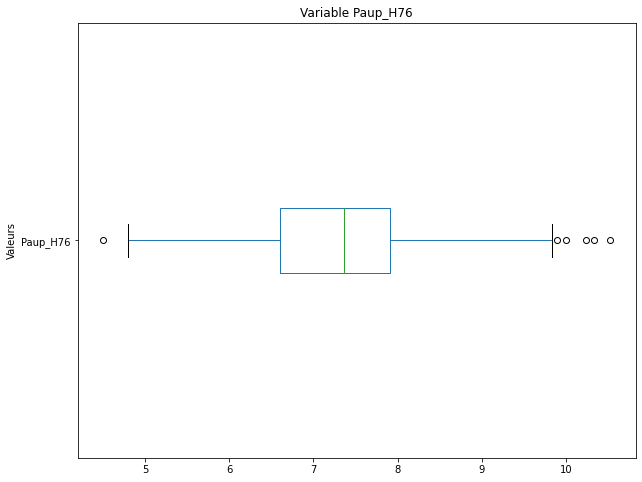

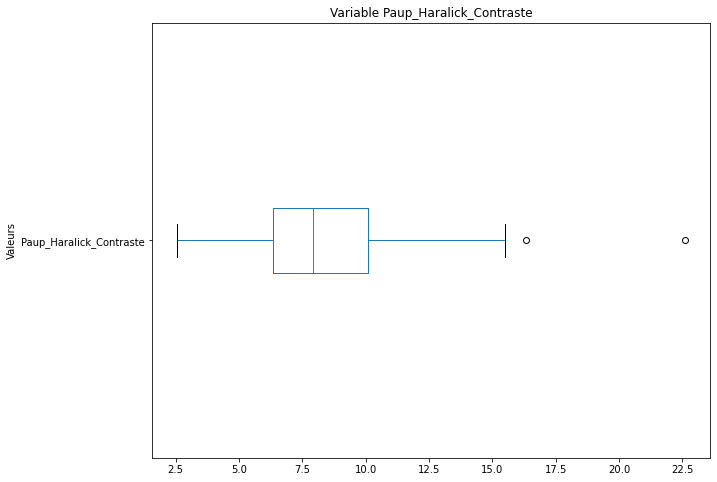

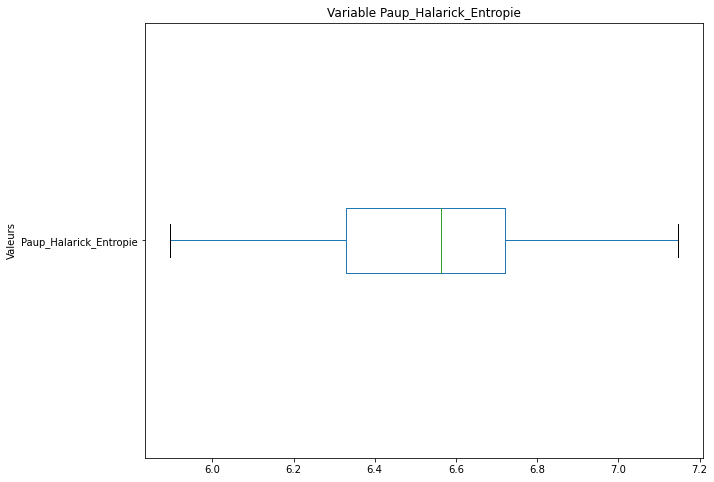

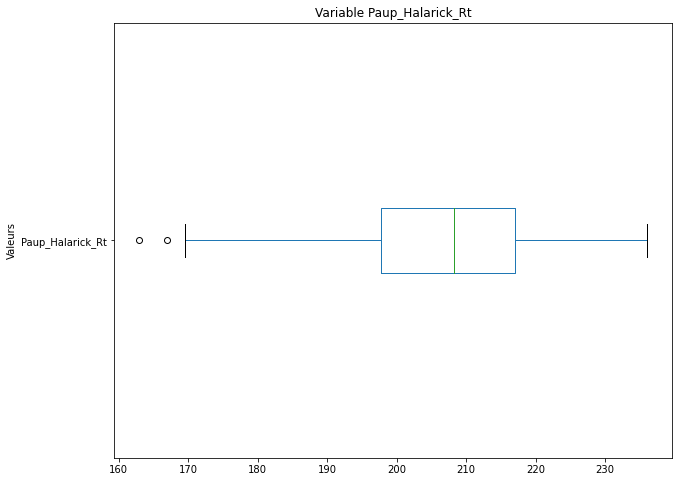

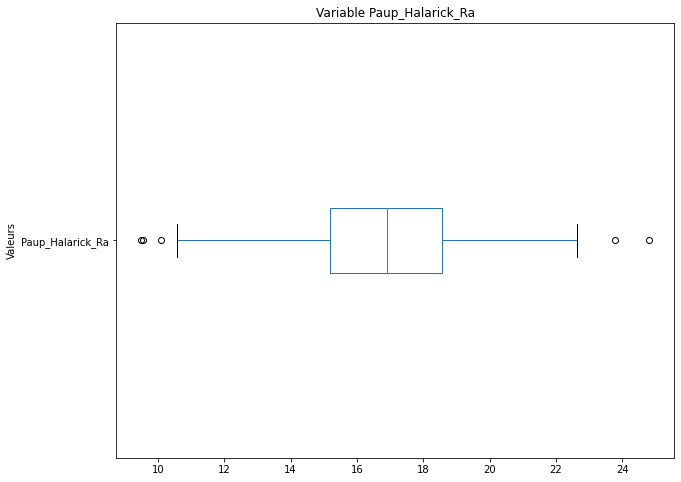

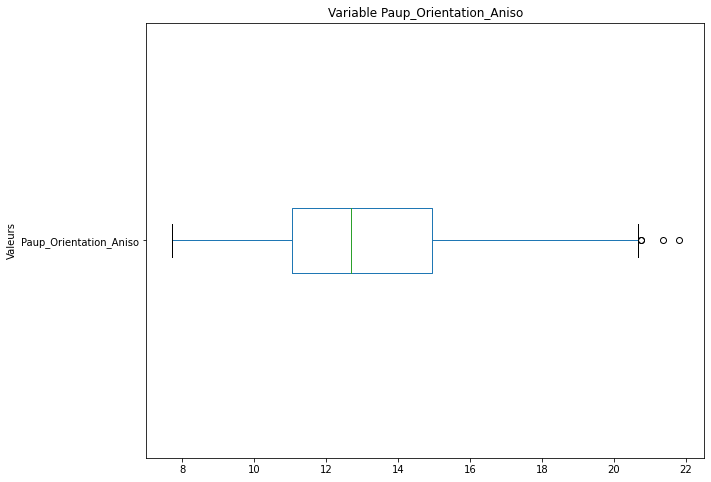

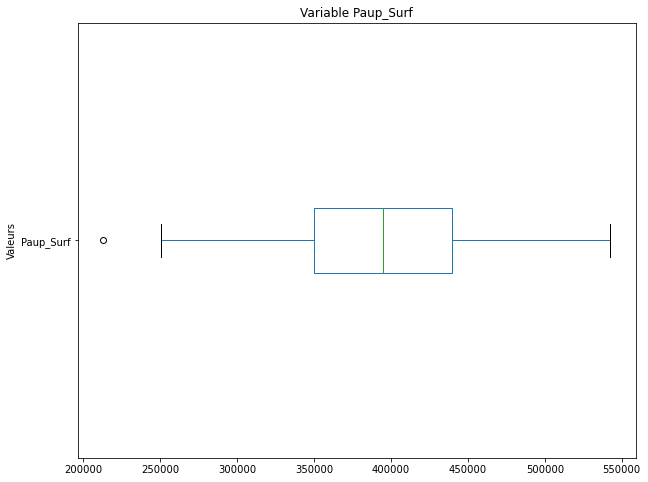

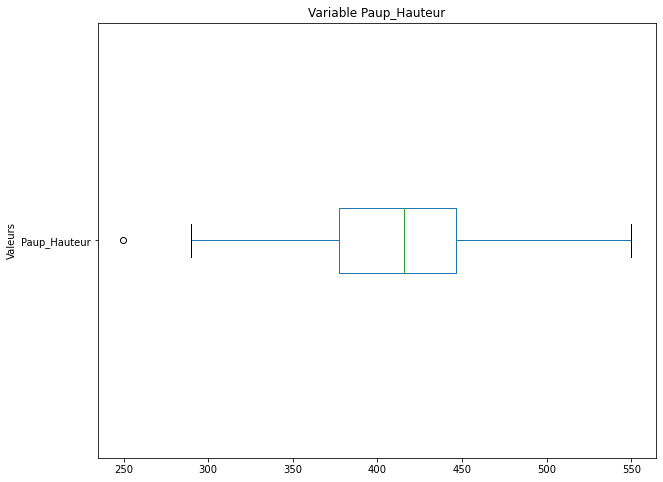

In [21]:
for col in cols_model:
    #col = 'Cerne_Surface'
    df.boxplot(column=col, figsize=(10,8), vert=False)
    plt.ylabel("Valeurs")
    plt.title("Variable " + col )
    plt.grid()
    plt.show()
    
    

# Identification des distributions


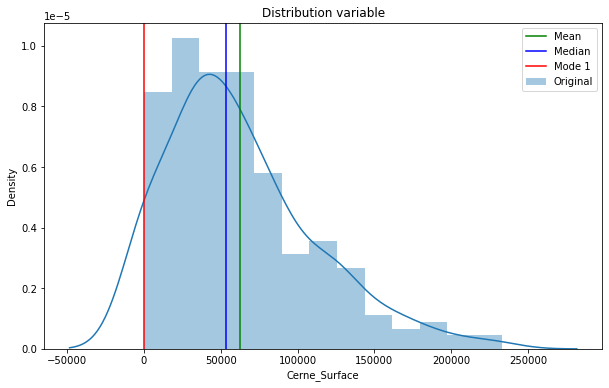

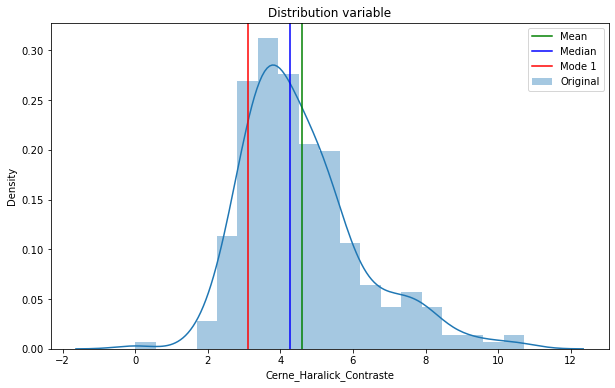

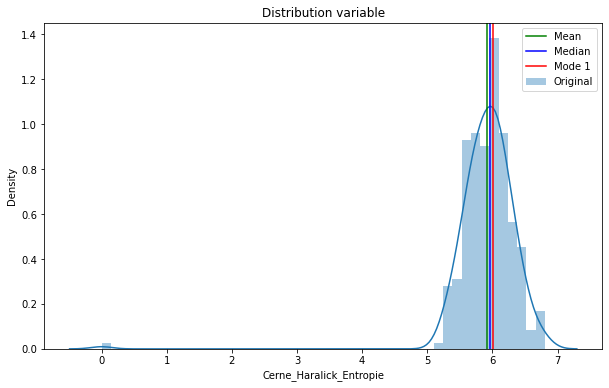

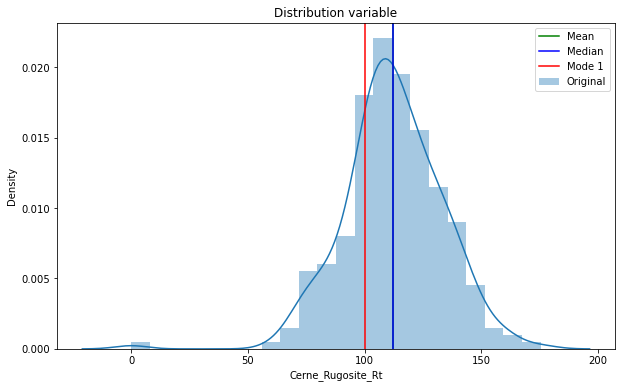

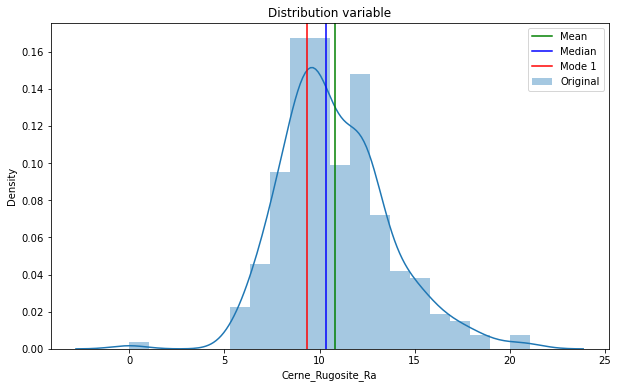

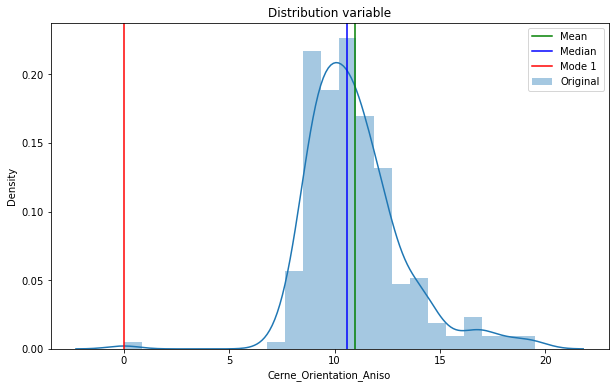

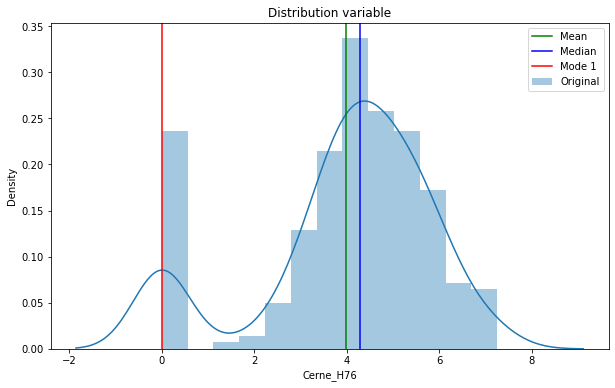

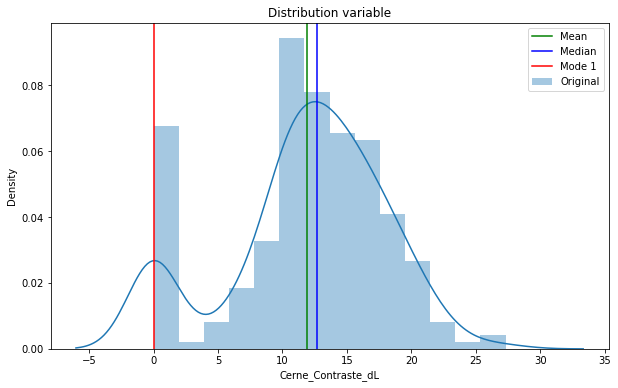

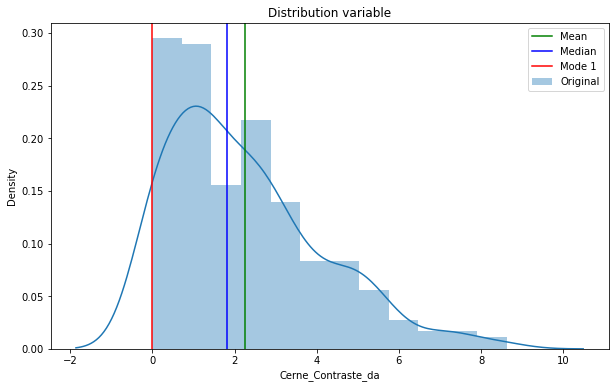

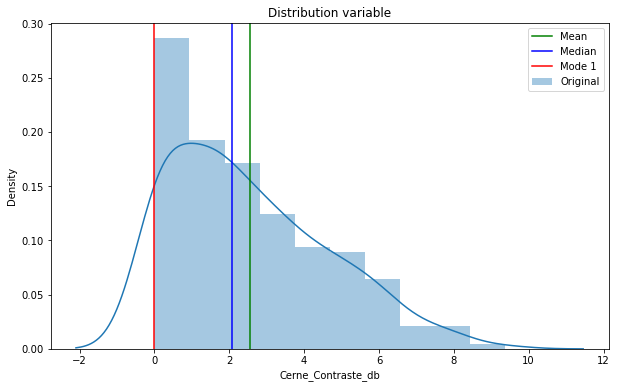

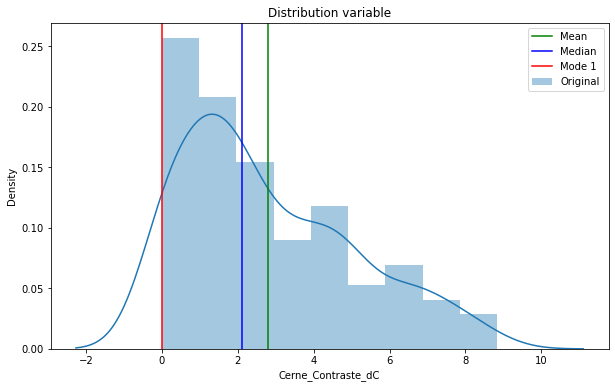

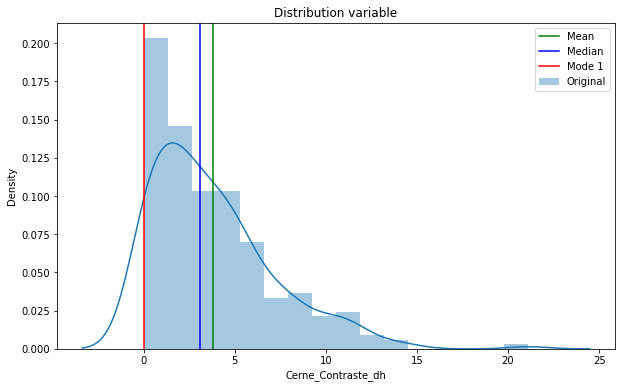

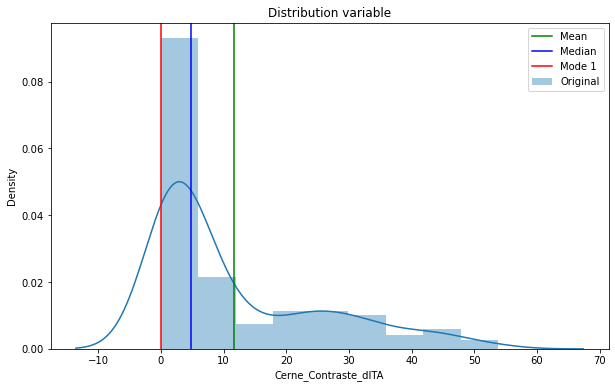

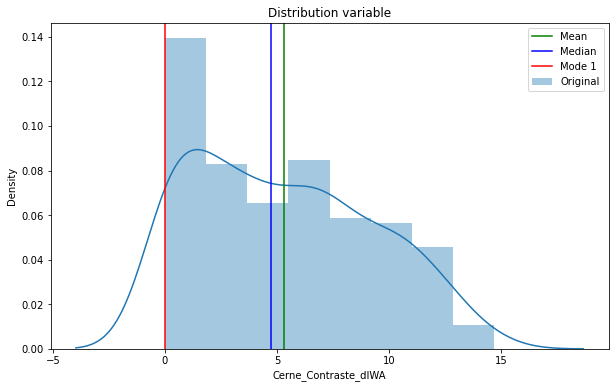

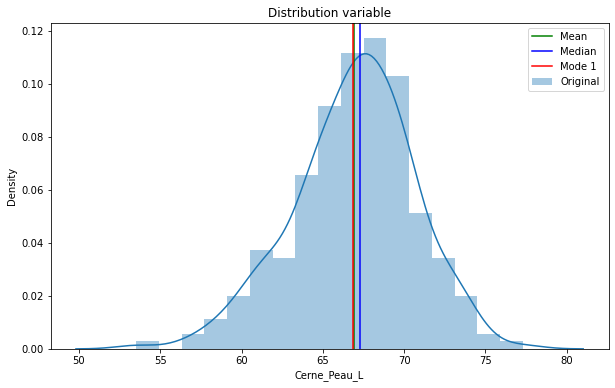

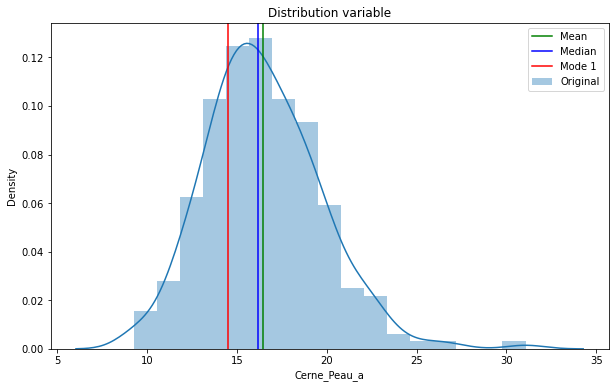

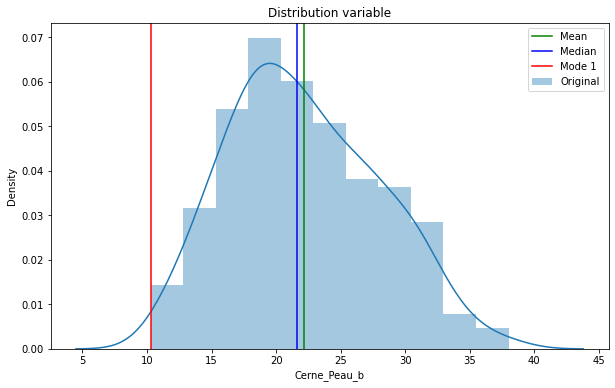

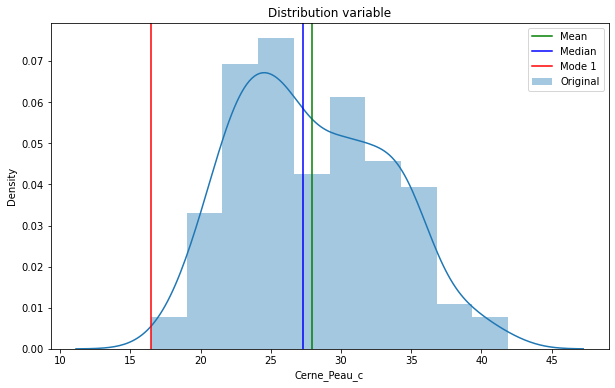

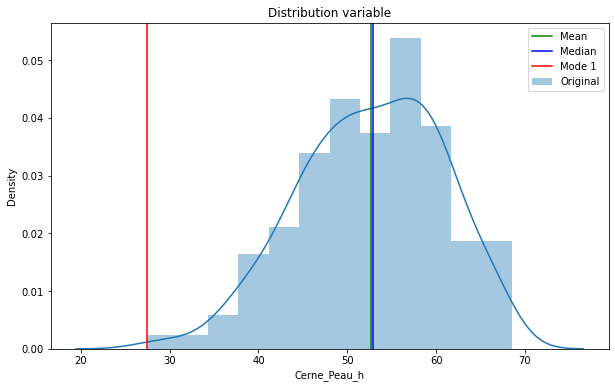

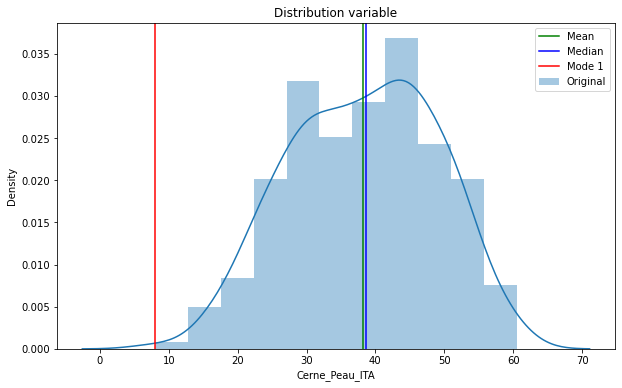

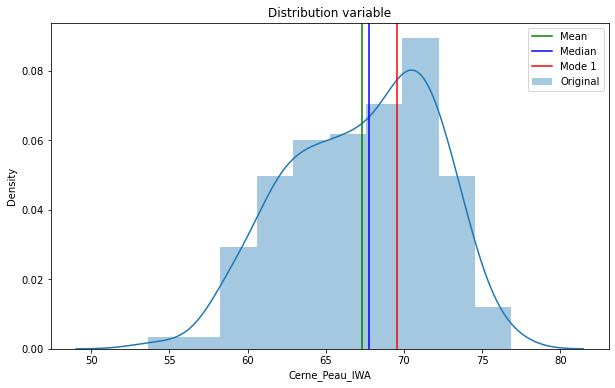

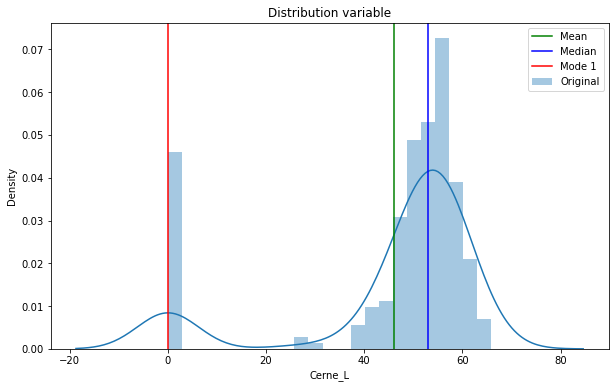

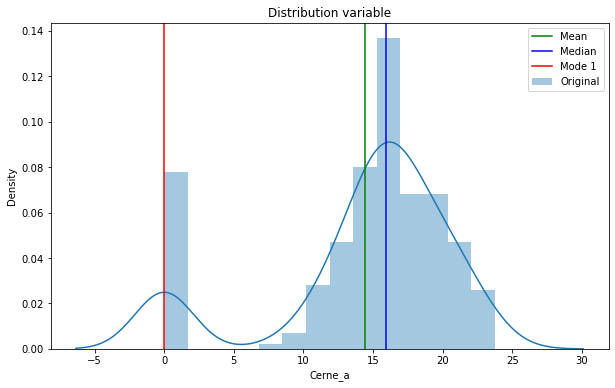

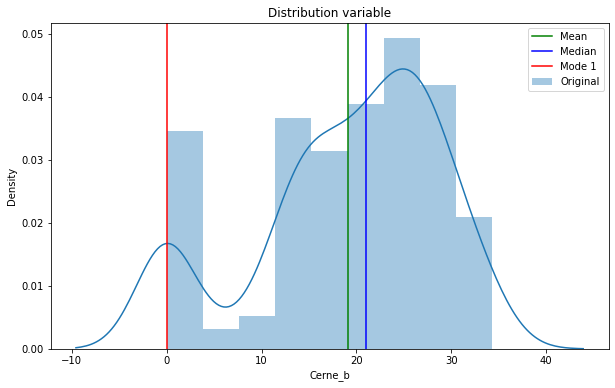

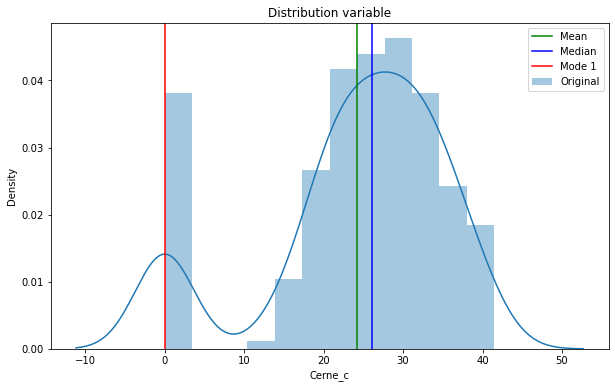

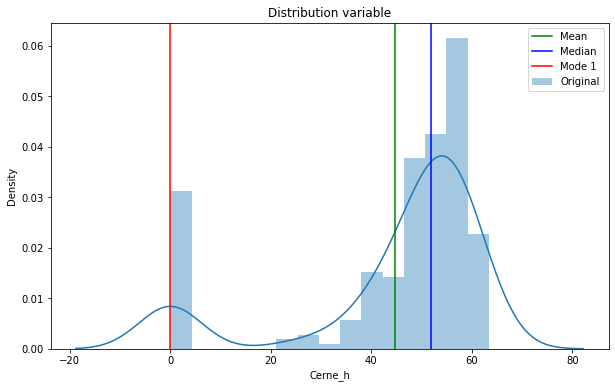

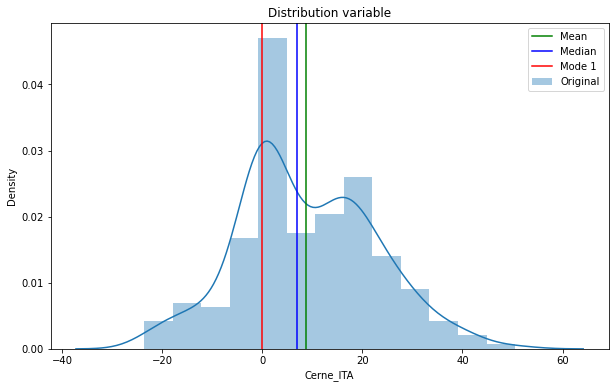

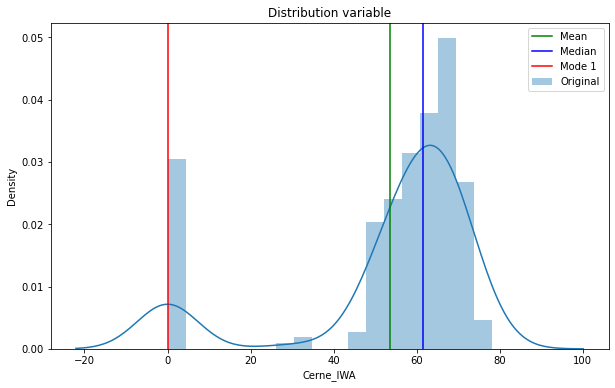

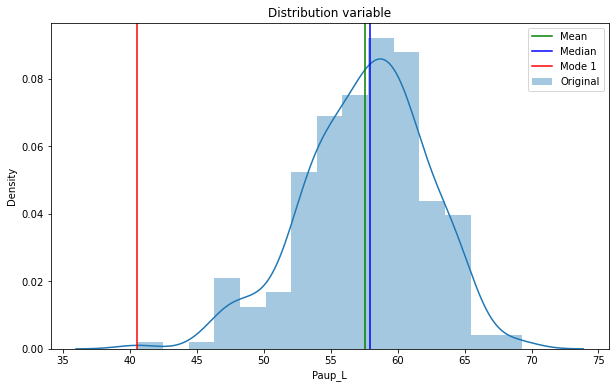

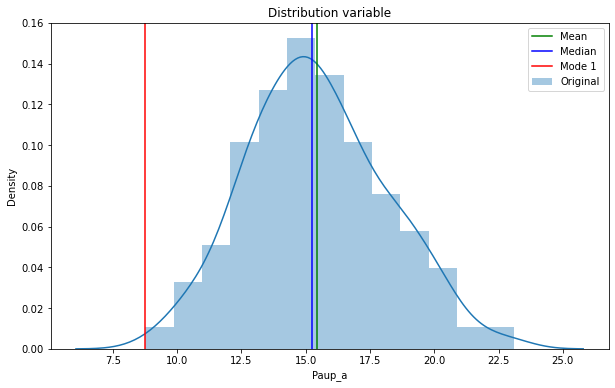

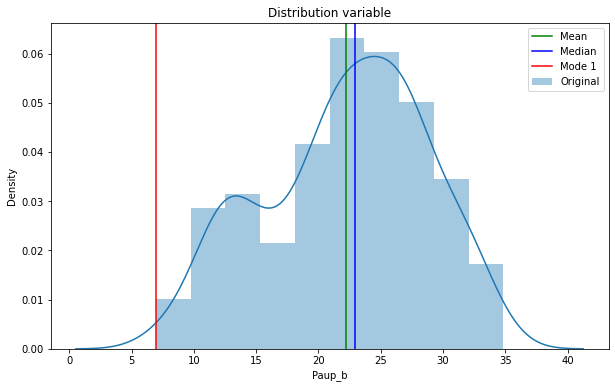

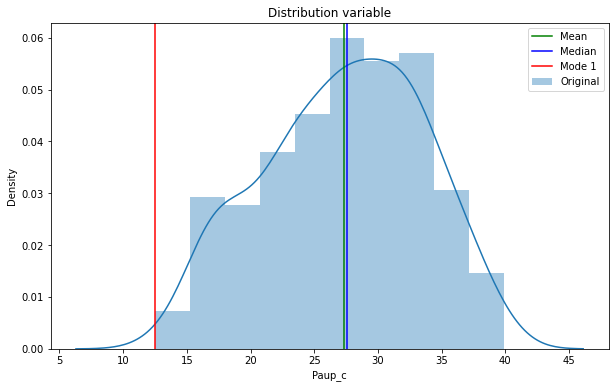

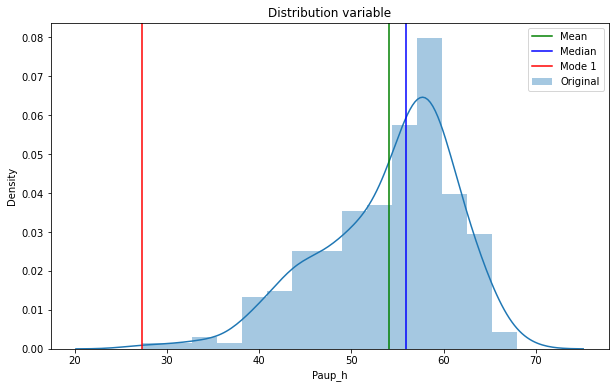

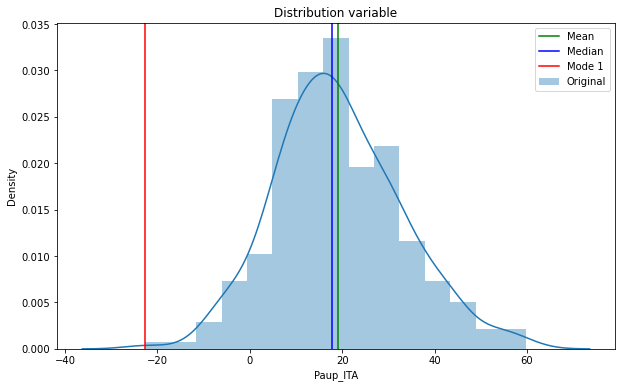

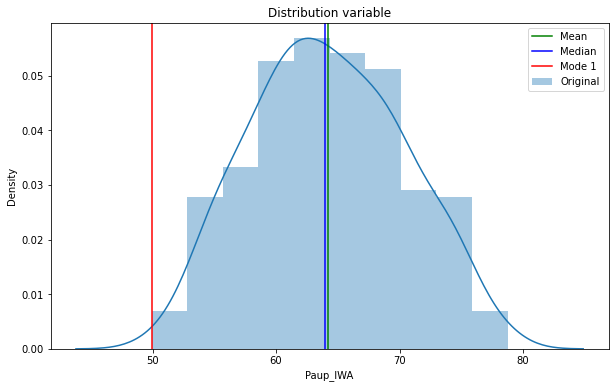

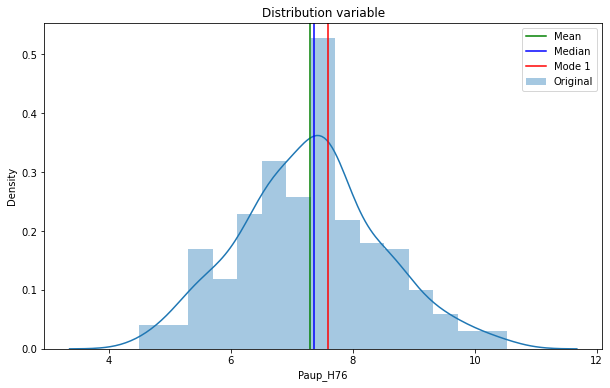

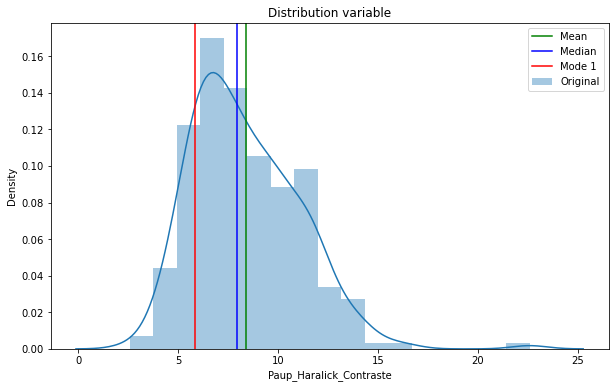

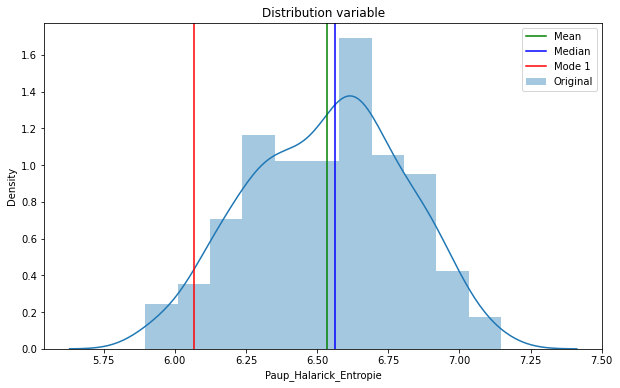

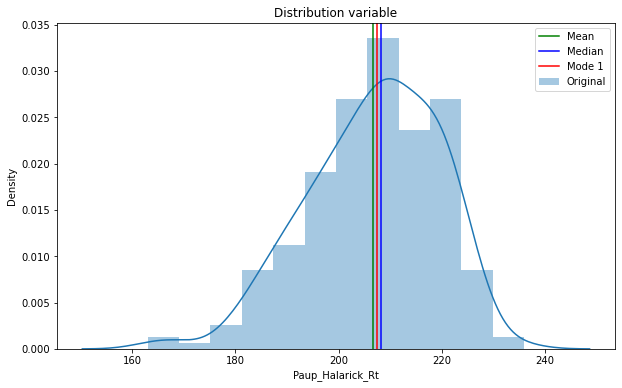

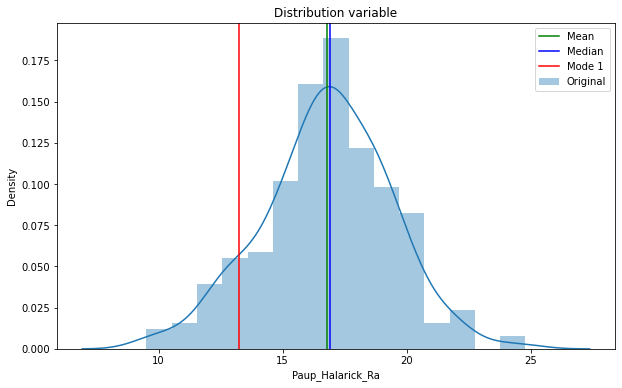

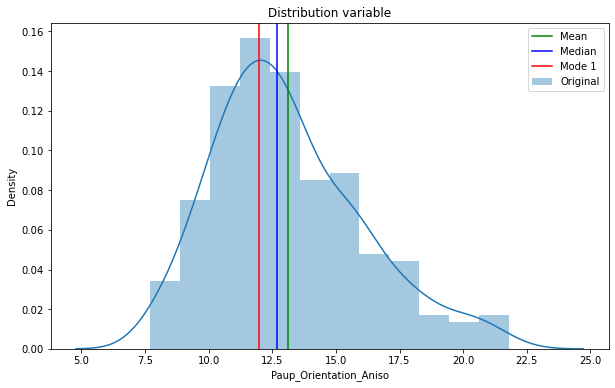

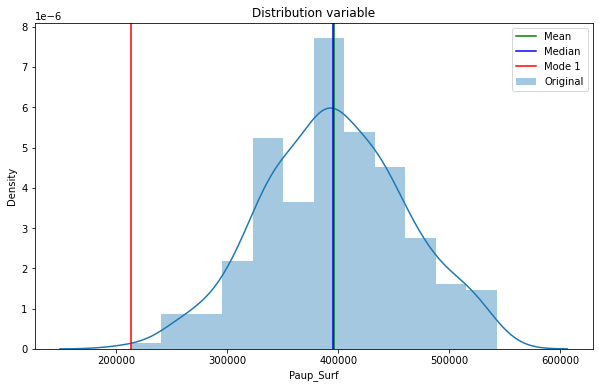

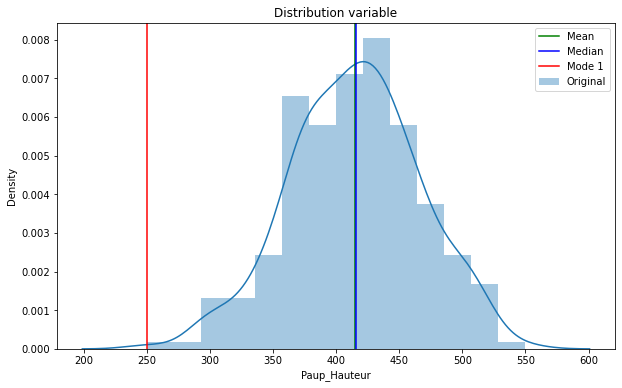

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Calcule numerique
for col in cols_model:
    #col = 'Cerne_Surface'

    mean=df[col].mean();
    median=df[col].median();
    mode=df[col].mode();

    # Plotting
    fig, ax = plt.subplots(figsize=(10,6));

    sns.distplot(df[col], label='Original');
    #sns.distplot(iris_Original_standarized['sepal_length'], label='Standarized');
    #sns.distplot(iris_Original_Norm['sepal_length'], label='Normalized');


    plt.title('Distribution variable');
    plt.axvline(mean,color='green',label='Mean'); 
    plt.axvline(median,color='blue',label='Median');
    plt.axvline(mode[0],color='red',label='Mode 1')

    plt.legend();




# 3.  PREPROCESSING: Normaliser les variables

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

Normalization scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision. Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

Different attributes are measured on different scales, so if the Euclidean distance formula were used directly, the effect of some attributes might be completely dwarfed by others that had larger scales of measurement. Consequently, it is usual to normalize all attribute values

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

This can be thought of as subtracting the mean value or centering the data.

Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

In [25]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [31]:
#sc = StandardScaler()
sc = RobustScaler()

* Note:
    * J'ai tester les deux, StandardScaler et RobustScaler. J'ai aps vu de différence flagrante si ce n'est qu'avec RobustScaler on aura 90% de variance expliqué avec les 3 premières composantes ACP contre 86% avec StandardScaler.

In [32]:
col_numeriques = df.columns[3:]

dfstd = sc.fit_transform(df[col_numeriques])
dfstd = pd.DataFrame(dfstd, columns = col_numeriques, index = df.index)
dfstd.head()

,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,Cerne_Contraste_da,Cerne_Contraste_db,...,Paup_ITA,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur
0,0.310511,-1.300331,-0.734126,-0.334975,0.634705,-0.613055,0.640290,0.297277,-0.208190,0.040763,...,1.484639,1.211713,-0.187790,-1.417902,-1.557442,-0.272727,-0.522452,-0.862329,0.324153,0.448165
1,0.615044,-0.023558,-0.071369,-0.610837,0.399133,0.484110,-0.007135,0.912610,-0.381296,0.002831,...,-0.944812,-0.236521,-0.519243,0.783890,0.679474,0.090909,0.024613,0.569989,1.091520,1.178300
2,-0.147475,-1.150790,-1.351539,-0.472906,-0.373026,-1.072389,-0.128937,-0.081028,0.677445,0.328483,...,1.358818,0.972587,0.193776,-0.758998,-0.865841,-2.350649,-0.957602,-0.237805,-0.157604,0.165719
3,-0.282624,-0.517017,0.012621,0.000000,0.585295,1.431728,-0.249274,0.409239,0.012002,-0.503857,...,1.074728,1.047838,0.412801,-0.069696,-0.068292,0.350649,0.336074,-0.888411,0.530827,0.629316
4,2.219595,-0.246160,0.286033,-0.295567,0.483964,0.095637,0.829585,-0.431839,-0.377393,-0.528598,...,0.511582,0.598866,1.207091,-0.294856,0.056548,-0.246753,-0.200197,-0.529268,0.014793,0.263857


# 4. ANALYSIS DE CORRELATION

In [33]:
correlation_matrix = np.corrcoef(dfstd[col_numeriques].transpose())

pd.DataFrame(correlation_matrix.round(2), columns = col_numeriques, index = col_numeriques)

,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,Cerne_Contraste_da,Cerne_Contraste_db,...,Paup_ITA,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur
Cerne_Surface,1.00,0.02,0.30,0.28,0.56,-0.19,0.76,0.21,0.12,0.11,...,0.08,0.35,0.48,-0.00,0.30,0.08,0.27,-0.08,-0.11,-0.02
Cerne_Haralick_Contraste,0.02,1.00,0.60,0.46,0.29,0.16,-0.04,0.01,-0.01,-0.15,...,-0.57,-0.49,0.09,0.59,0.54,0.01,0.17,0.14,-0.00,-0.06
Cerne_Haralick_Entropie,0.30,0.60,1.00,0.64,0.70,0.22,0.21,0.12,-0.02,-0.13,...,-0.29,-0.15,0.25,0.33,0.47,0.07,0.24,0.08,-0.01,-0.05
Cerne_Rugosite_Rt,0.28,0.46,0.64,1.00,0.60,0.03,0.25,0.08,0.02,-0.12,...,-0.24,-0.12,0.28,0.31,0.43,0.04,0.20,0.08,-0.02,-0.07
Cerne_Rugosite_Ra,0.56,0.29,0.70,0.60,1.00,-0.06,0.54,0.34,0.03,-0.03,...,-0.17,0.05,0.41,0.15,0.44,0.03,0.28,0.03,-0.07,-0.07
Cerne_Orientation_Aniso,-0.19,0.16,0.22,0.03,-0.06,1.00,-0.20,-0.14,-0.05,-0.10,...,-0.09,-0.11,-0.15,0.09,-0.00,-0.02,-0.03,0.17,0.09,0.06
Cerne_H76,0.76,-0.04,0.21,0.25,0.54,-0.20,1.00,0.63,0.31,0.30,...,0.12,0.32,0.43,-0.01,0.26,0.10,0.26,-0.04,-0.05,0.02
Cerne_Contraste_dL,0.21,0.01,0.12,0.08,0.34,-0.14,0.63,1.00,0.43,0.42,...,-0.20,-0.18,0.19,0.09,0.22,0.10,0.25,0.05,0.06,0.04
Cerne_Contraste_da,0.12,-0.01,-0.02,0.02,0.03,-0.05,0.31,0.43,1.00,0.37,...,-0.06,-0.09,0.21,-0.00,0.14,0.02,0.23,0.02,-0.04,-0.01
Cerne_Contraste_db,0.11,-0.15,-0.13,-0.12,-0.03,-0.10,0.30,0.42,0.37,1.00,...,0.00,-0.02,0.22,-0.03,0.11,0.09,0.28,-0.04,0.02,0.04


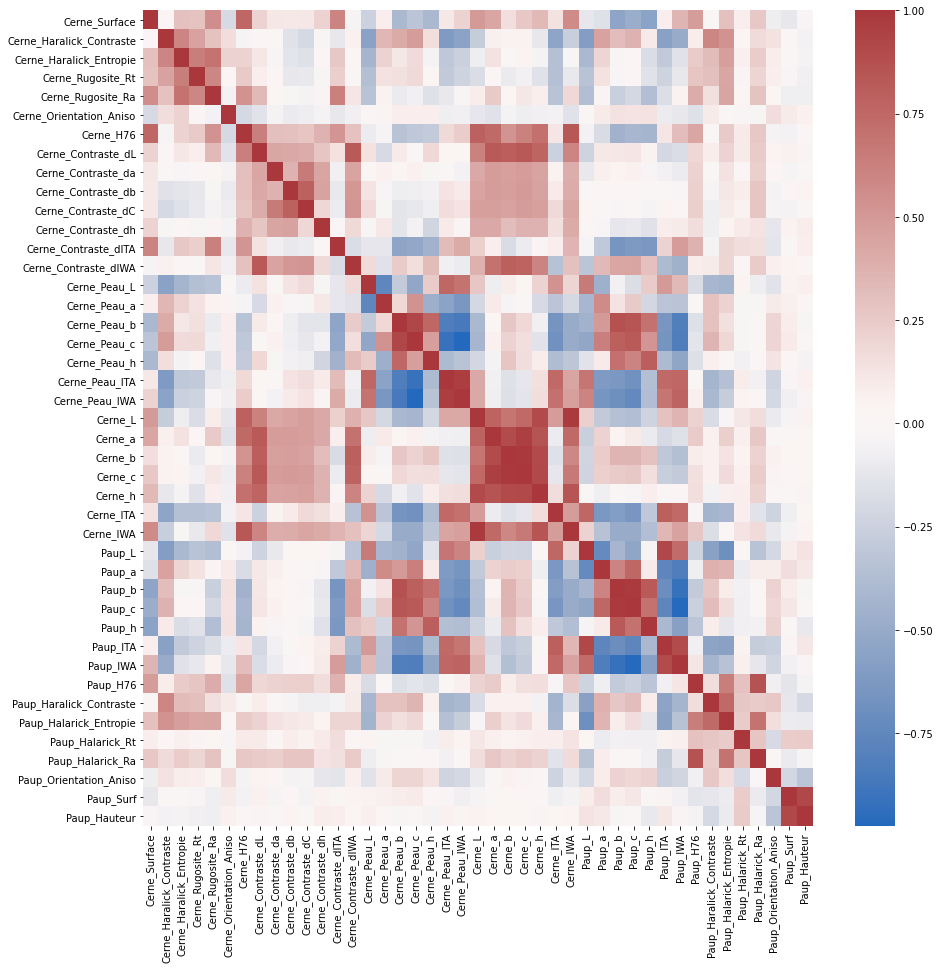

In [34]:
import seaborn as sns

dfCorrelation = correlation_matrix.astype('float')  # !! Neccessary for Heatmap
dfCorrelation = pd.DataFrame(correlation_matrix, columns = col_numeriques, index = col_numeriques)
plt.figure(figsize=(15,15))
sns.heatmap(dfCorrelation, annot=False, cmap="vlag")
plt.show()

# 5.  VARIANCE EXPLIQUE

# Calcule eigenvalues et eigenvecteurs

In [37]:
eig_vals, eig_vecs = np.linalg.eig(correlation_matrix)
eig_vals.round(3)


array([1.1555e+01, 8.7140e+00, 5.7300e+00, 2.4820e+00, 2.1650e+00,
       1.9990e+00, 1.3130e+00, 1.2640e+00, 1.2070e+00, 8.6700e-01,
       8.2400e-01, 7.1400e-01, 6.3600e-01, 6.2400e-01, 5.3200e-01,
       4.4700e-01, 3.6400e-01, 2.6100e-01, 2.4600e-01, 2.1600e-01,
       1.7200e-01, 1.3000e-01, 9.3000e-02, 8.6000e-02, 6.3000e-02,
       5.6000e-02, 4.8000e-02, 4.4000e-02, 3.7000e-02, 3.5000e-02,
       2.9000e-02, 2.0000e-02, 9.0000e-03, 7.0000e-03, 5.0000e-03,
       2.0000e-03, 1.0000e-03, 1.0000e-03, 1.0000e-03, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00])

# Calcule de la variance Explique avec PCA

In [39]:
from sklearn.decomposition import PCA


pca = PCA(n_components=None)
pca.fit(dfstd)

print('Explained variance ratio: ',pca.explained_variance_ratio_.round(3))

Explained variance ratio:  [0.38  0.185 0.117 0.045 0.039 0.036 0.029 0.024 0.021 0.016 0.015 0.013
 0.011 0.011 0.01  0.009 0.008 0.005 0.005 0.004 0.003 0.002 0.002 0.002
 0.001 0.001 0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.   ]


Explained variance ratio:  [0.38  0.185 0.117 0.045 0.039 0.036 0.029 0.024 0.021 0.016 0.015 0.013
 0.011 0.011 0.01  0.009 0.008 0.005 0.005 0.004 0.003 0.002 0.002 0.002
 0.001 0.001 0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.   ]


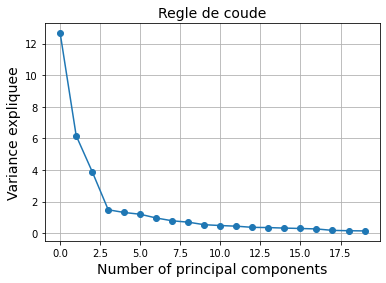

In [40]:
from sklearn.decomposition import PCA

# Numero de composants
Nmax = 20
Nmin = 2


pca = PCA(n_components=None)
pca.fit(dfstd)

print('Explained variance ratio: ',pca.explained_variance_ratio_.round(3))
explained_variance=pca.explained_variance_

import matplotlib.pyplot as plt
plt.plot(np.arange(Nmax),explained_variance[:Nmax], marker='o')
plt.title('Regle de coude', fontsize=14)
plt.xlabel('Number of principal components', fontsize=14)
plt.ylabel('Variance expliquee', fontsize=14)
plt.grid(True)
plt.show()
None


# Calcule de la variance Explique Accumule avec PCA

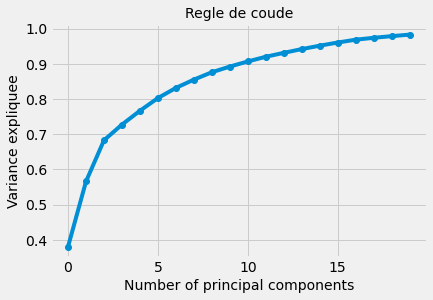

In [46]:
explained_variance_cumsum = pca.explained_variance_ratio_.cumsum()
explained_variance_cumsum

import matplotlib.pyplot as plt
plt.plot(np.arange(Nmax),explained_variance_cumsum[:Nmax], marker='o')
plt.title('Regle de coude', fontsize=14)
plt.xlabel('Number of principal components', fontsize=14)
plt.ylabel('Variance expliquee', fontsize=14)
plt.grid(True)
plt.show()
None



In [42]:
explained_variance_cumsum

array([0.38047881, 0.56594365, 0.68302607, 0.72757824, 0.76696184,
       0.8029921 , 0.83187708, 0.85544175, 0.8763978 , 0.89252143,
       0.90708844, 0.92041146, 0.93152591, 0.94219441, 0.95191009,
       0.96084494, 0.96892797, 0.97428047, 0.97897128, 0.98329345,
       0.98669324, 0.989156  , 0.99102795, 0.9927796 , 0.99420455,
       0.99544338, 0.99637187, 0.99726119, 0.99799783, 0.99861003,
       0.99910704, 0.99943948, 0.99964852, 0.99976676, 0.99986575,
       0.99991105, 0.99994086, 0.9999667 , 0.99998451, 0.9999943 ,
       0.99999736, 0.99999906, 1.        ])

# Calcule Coefficient of Sihouette

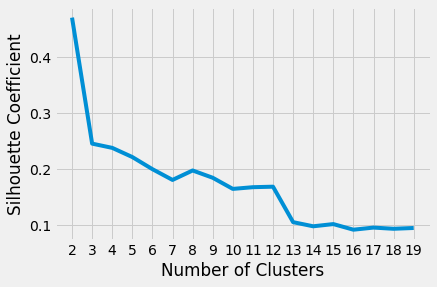

In [48]:
# Usinng Coefficient of Sihouette

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans_kwargs = {
 "init": "random",
 "n_init": Nmax,
 "max_iter": 300,
 "random_state": 42,
}

silhouette_coefficients2 = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(Nmin, Nmax):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dfstd)
    score = silhouette_score(dfstd, kmeans.labels_)
    silhouette_coefficients2.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,20), silhouette_coefficients2)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#Siluete ca doit etre haut et inertie proche de zero

# ACP

In [55]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver = "full")

In [56]:
# calcul des nouvelles coordonnées
X_pca = pca.fit_transform(dfstd)
print('variances expliquées:\n',pca.explained_variance_ratio_.round(3))

variances expliquées:
 [0.38  0.185 0.117 0.045 0.039 0.036 0.029 0.024 0.021 0.016 0.015 0.013
 0.011 0.011 0.01  0.009 0.008 0.005 0.005 0.004 0.003 0.002 0.002 0.002
 0.001 0.001 0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.   ]


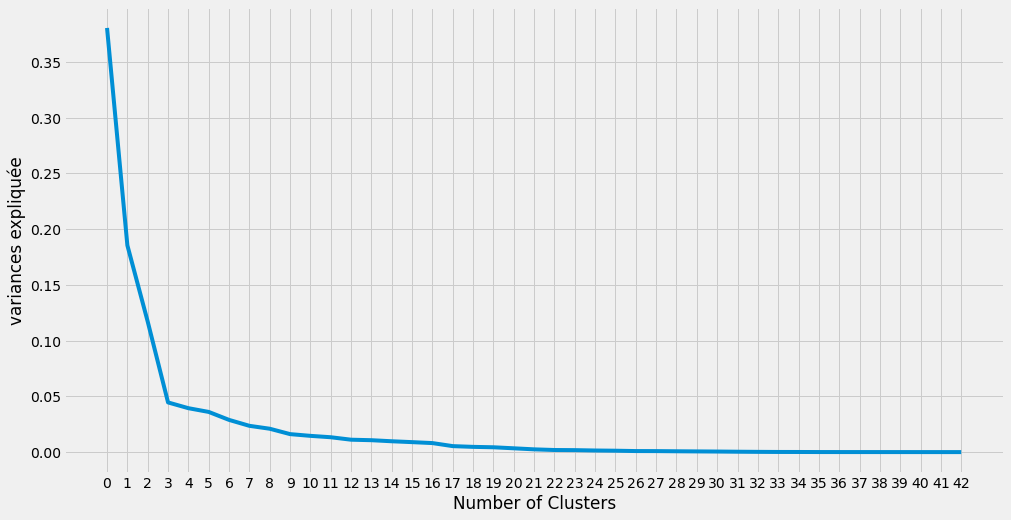

In [61]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.plot(range(0, 43), pca.explained_variance_ratio_)
plt.xticks(range(0, 43))
plt.xlabel("Number of Clusters")
plt.ylabel("variances expliquée")
plt.show()

In [63]:
# valeur propre en fct des nouvelles variables
eigval = pca.explained_variance_
eigval.round(3)

array([1.2649e+01, 6.1660e+00, 3.8920e+00, 1.4810e+00, 1.3090e+00,
       1.1980e+00, 9.6000e-01, 7.8300e-01, 6.9700e-01, 5.3600e-01,
       4.8400e-01, 4.4300e-01, 3.6900e-01, 3.5500e-01, 3.2300e-01,
       2.9700e-01, 2.6900e-01, 1.7800e-01, 1.5600e-01, 1.4400e-01,
       1.1300e-01, 8.2000e-02, 6.2000e-02, 5.8000e-02, 4.7000e-02,
       4.1000e-02, 3.1000e-02, 3.0000e-02, 2.4000e-02, 2.0000e-02,
       1.7000e-02, 1.1000e-02, 7.0000e-03, 4.0000e-03, 3.0000e-03,
       2.0000e-03, 1.0000e-03, 1.0000e-03, 1.0000e-03, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00])

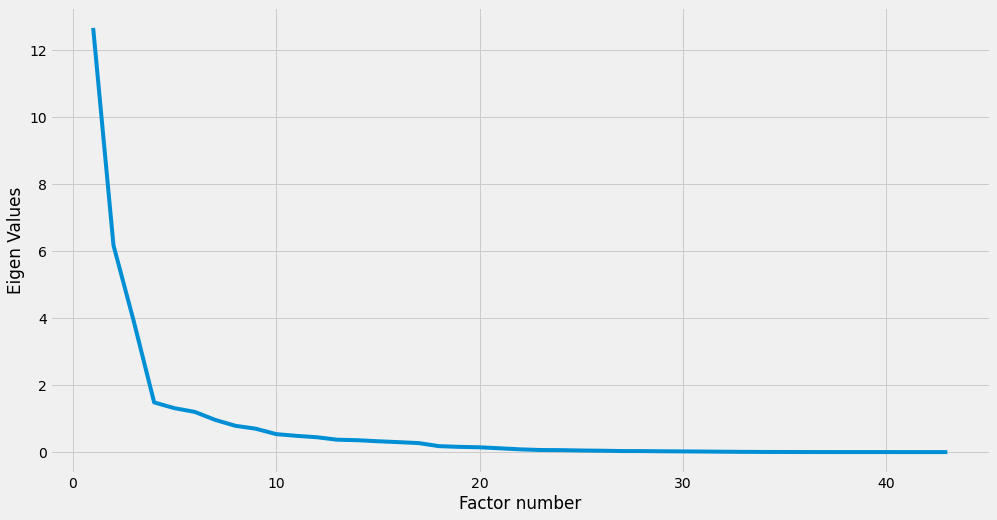

In [65]:
# les valeur propre en fct du numero de la nouvelle variable

plt.figure(figsize=(15,8))
plt.plot(np.arange(1,df.shape[1]-2), eigval)
plt.ylabel("Eigen Values")
plt.xlabel("Factor number")
plt.show()

In [138]:
# vérification
percen = 0.67
pca = PCA(n_components = percen, svd_solver = "full")
X_pca = pca.fit_transform(dfstd)
print("Shape:",X_pca.shape)
print("avec", X_pca.shape[1], "dimension(s) on a: ", percen *100, "% de variance expliquée")

Shape: (250, 3)
avec 3 dimension(s) on a:  67.0 % de variance expliquée


* Pas loins du cas idéal avec les 90 % de variance expliquée

## projection sur les composantes 0, 1

In [139]:
def plot_pca(cmp1,cmp2, X_pca=X_pca, df=df):
    import matplotlib.pyplot as plt
    f, ax= plt.subplots(figsize=(16,9))
    for i in range(df.shape[0]):
        plt.annotate(df.index[i], (X_pca[i,cmp1], X_pca[i,cmp2]))
        plt.plot([X_pca[:,cmp1].min(),X_pca[:,cmp1].max()],[0,0],color = "silver", linestyle = "-", linewidth=1)
        plt.plot([0,0],[X_pca[:,cmp2].min(),X_pca[:,cmp2].max()],color = "silver", linestyle = "-", linewidth=1)
        ax.set_xlabel("X_pca_"+str(cmp1),fontsize=15)
        ax.set_ylabel("X_pca_"+str(cmp2),fontsize=15)
    plt.tight_layout() 
    plt.show()

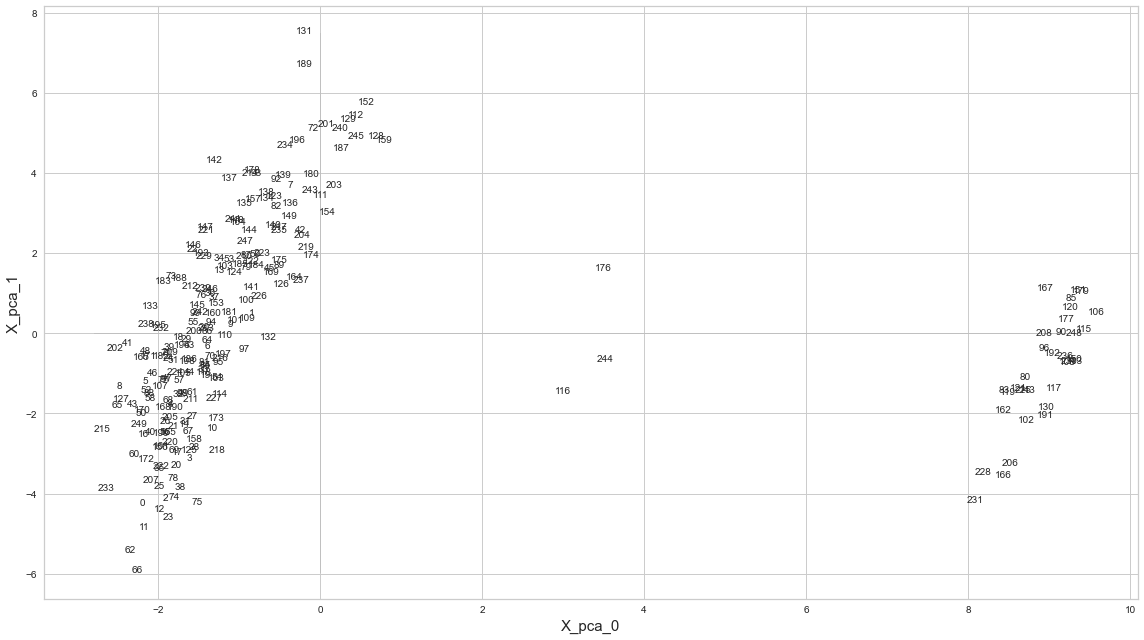

In [140]:
plot_pca(0, 1, X_pca, dfstd)

## projection sur les composantes 0, 2

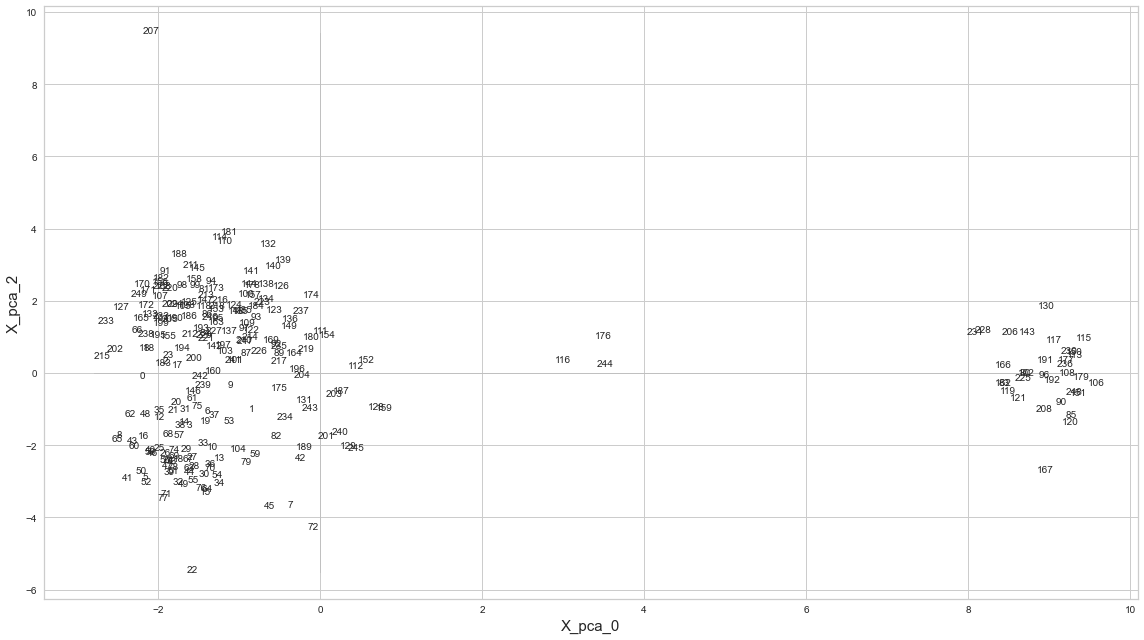

In [141]:
plot_pca(0,2,X_pca,df)

## projection sur les composantes 1, 2

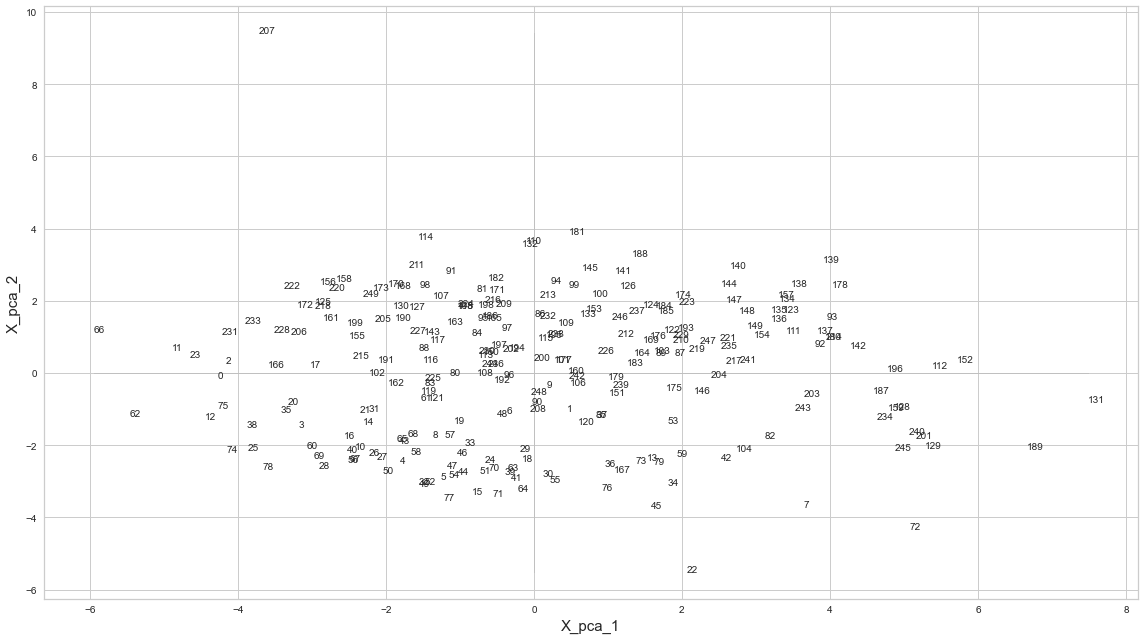

In [142]:
plot_pca(1,2,X_pca,df)

## projection PCA en 3D: composantes 0,1,2

 * **Note importante**
    * pour le plot 3D, une nouvelle fenetre s'ouvre et on peut faire tourner le graphique

In [143]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib
matplotlib.use('Qt5Agg')
ax = plt.axes(projection = "3d",)
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],  s = 100)
ax.set_xlabel("X_pca_0")
ax.set_ylabel("X_pca_1")
ax.set_zlabel("X_pca_2")
n=dfstd.shape[0]
for i in range(n):
    ax.text(X_pca[i,0], X_pca[i,1], X_pca[i,2], "%s"%(dfstd.index[i]))

Using matplotlib backend: Qt5Agg


* **executer cette cellule pour remettre les plots sur le notebook(inline)**

In [144]:
# pip install mplot3d-dragger

In [145]:
%matplotlib inline



* **Note**:
    * Rien qu'avec la PCA et visuellement, on voit qu'un cluster se distinge, le groupe des fromages frais dans le graphique X_pca_1 en fonction de X_pca_0.
    * Dans le graphique 3D, si on regarde le plan X_pca0, X_pca1, il semble que les fromages se classe de haut en bas selon l'axe X_pca2
    * Confirmer le clusters avec KMeans

# Clustering: KMeans

In [146]:
from sklearn.cluster import KMeans
from sklearn import metrics

## recherche du nombre de clusters


In [147]:
# fonction pour calculer et visualiser les parametres silhouette et inertie
def plot_silhouette_inertie(df, k_range):
    from sklearn.cluster import KMeans
    from sklearn import metrics
    import matplotlib.pyplot as plt
    
    inertia = []
    res = []
    
    for k in k_range:
        model = KMeans(n_clusters=k, n_init=20, random_state=42).fit(df)
        res.append(metrics.silhouette_score(df, model.labels_))
        inertia.append(model.inertia_)

    #plot nb. clusters vs. silhouette score 
    plt.figure(figsize=(15,8))
    plt.grid()
    plt.plot(k_range, res)
    plt.title("Silhouette")
    plt.xlabel("Nombre de classes")
    plt.ylabel("Coefficient de silhouette")
    plt.tight_layout()
    plt.show() 
    #plot nb. clusters vs. Inertie score 
    plt.figure(figsize=(15,8))
    plt.grid()
    plt.plot(k_range, inertia)
    plt.title("Inertie")
    plt.xlabel("Nombre de classes")
    plt.ylabel("Coefficient d'inertie")
    plt.tight_layout()
    plt.show() 

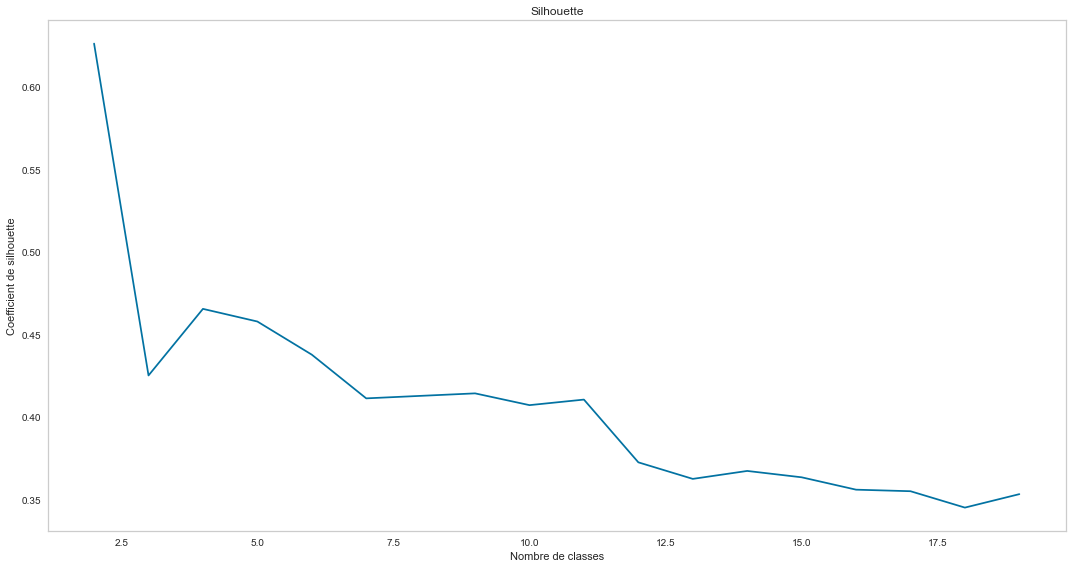

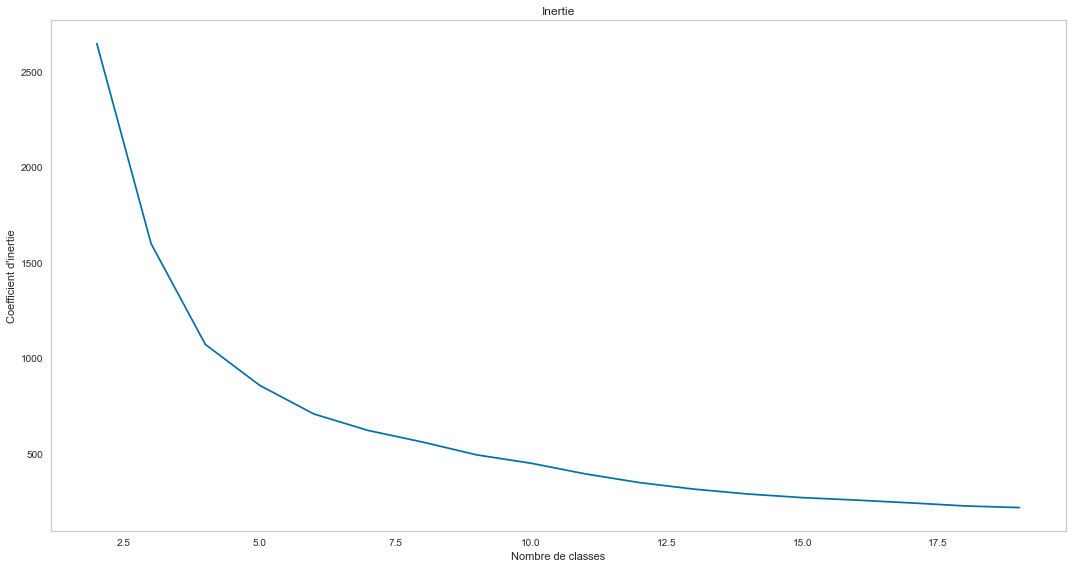

In [148]:
plot_silhouette_inertie(X_pca, range(2,20,1))

* Note:
    * le score silhouette est un peux mieux avec ACP
    * Le facteur silhouette n'est pas très élevé: 0.475
    * Point d'inflexion pour Nombre de classes = 4
    * on va choisir 4 clusters même si 5 parait etre un bon candidat

IndexError: index 2 is out of bounds for axis 0 with size 2

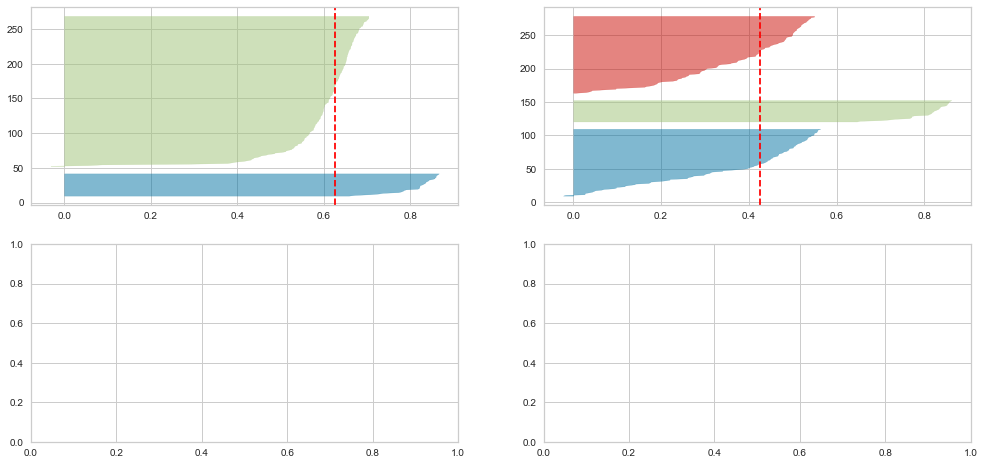

In [149]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 7, 11]:
    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_pca)

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

i=4
km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X_pca)

In [ ]:
i=11
km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X_pca)

In [ ]:
# pip install yellowbrick

In [ ]:
i=9
km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X_pca)

* Note:
    * Aucun cluster n'est en dessous de la limite
    * Un cluster est beaucoup plus rempli que les autres
    * Les clusters semblent bien détachés les uns par rapport aux autres meme si le score est < 0.5
    * Ca confirme que 4 cluster est le meilleur choix

In [ ]:
nbr_cluster = 3
km = KMeans(n_clusters = nbr_cluster, n_init=20, random_state=42)     
# on peut entrainer le modèle et obtenir les labels en meme temps avec fit_predict
prediction = km.fit_predict(X_pca)
prediction

## visualiser comment sont classées nos données: visualiser les clusters

In [ ]:
def plot_cmpv2(cmp1,cmp2, X_pca=X_pca, dfstd=dfstd, prediction=prediction):
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
#
    nbr_cluster = len(np.unique(prediction))
    colors = colors = cm.nipy_spectral(prediction/nbr_cluster)

    # visualiser comment sont classées nos données: visualiser les clusters
    plt.figure(figsize=(16,9))

    for k in range(nbr_cluster):
        plt.scatter(X_pca[prediction == k,cmp1], X_pca[prediction == k,cmp2], c = colors[prediction == k], s = 100 
                     )
    plt.xlabel("X_pca_"+str(cmp1),fontsize=15)
    plt.ylabel("X_pca_"+str(cmp2),fontsize=15)
    
    # positions finales des centroides
    plt.scatter(km.cluster_centers_[:,cmp1], km.cluster_centers_[:,cmp2], c = 'r', marker = '+', s = 100,
               alpha=0.75, linewidth= 1.5)

    # mettre le nom des fromages
    for i, idx in enumerate(dfstd.index):
        plt.annotate(idx, (X_pca[i,cmp1], X_pca[i,cmp2]))
        
    plt.tight_layout()

### composantes: 0, 1

In [ ]:
plot_cmpv2(0,1,X_pca,dfstd,prediction)

### composantes: 0, 2

In [ ]:
plot_cmpv2(0,2,X_pca,dfstd,prediction)

### composantes: 1, 2

In [ ]:
plot_cmpv2(1,2,X_pca,dfstd,prediction)

## plot 3D: composantes 0,1,2

 * **Note importante**
    * pour le plot 3D, une nouvelle fenetre s'ouvre et on peut faire tourner le graphique pour bien observer les clusters 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib
nbr_cluster = len(np.unique(prediction))
colors = colors = cm.nipy_spectral(prediction/nbr_cluster)
    
ax = plt.axes(projection = "3d",)
for k in range(nbr_cluster):
    ax.scatter(X_pca[prediction == k,0], X_pca[prediction == k,1], X_pca[prediction == k,2],
               c = colors[prediction == k], s = 100, alpha=0.9, edgecolors="grey", linewidth= 1.5) 

ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], c = 'r', marker = '+', s = 100,
               alpha=0.5, linewidth= 1.5)
ax.set_xlabel("X_pca_0")
ax.set_ylabel("X_pca_1")
ax.set_zlabel("X_pca_2")
n=dfstd.shape[0]
for i in range(n):
    ax.text(X_pca[i,0], X_pca[i,1], X_pca[i,2], "%s"%(dfstd.index[i]))

* **executer cette cellule pour remettre les plots sur le notebook(inline)**

In [ ]:
%matplotlib inline

## Valider les clusters


https://gdcoder.com/silhouette-analysis-vs-elbow-method-vs-davies-bouldin-index-selecting-the-optimal-number-of-clusters-for-kmeans-clustering/

### score silhouette par cluster

In [ ]:
for nbr in range(nbr_cluster):
    print("cluster", nbr)
    print("score silhouette:", metrics.silhouette_score(X_pca, prediction==nbr))
    print("")


### somme des distances par rapport au centre d'un cluster

In [ ]:
distances = km.fit_transform(X_pca)
for label in range(nbr_cluster): 
    print("cluster ", label)
    print("somme_distance:", distances[:,label].sum())  #Cohesion
    print("")

### index Davies_bouldin

evaluates intra-cluster similarity and inter-cluster differences while the Silhouette score measure the distance between each data point,

Entre mas pquena mas cohesion.

In [ ]:
for label in np.unique(prediction):
    print("cluster:", label)
    print("nbr_element dans le cluster:", dfstd.groupby(prediction).size()[label])
    print("davies_bouldin_score:",metrics.davies_bouldin_score(dfstd, prediction == label).round(3))
    print("liste d'individus:\n")
    idk=np.argsort(prediction)
    dfname = pd.DataFrame(dfstd.index[idk], prediction[idk])
    dfname[dfname.index == label].apply(lambda x: print(x.values))
    print("="*50)

* Notes:
    * Un cluster avec un index > 2.
    * On observe des indexes très proches de 1. Ceci peut s'expliquer par le fait qu'on a peu d'individus, que les clusters ne sont pas vraiment globulaires et aussi, que le facteur silhouette est de 0.475 pour 4 clusters et donc l'index peut être biaisé.
    * Meme si le cluster avec l'index 0.62 se détache bien du reste, l'indexe est faible car il ne contient pas beaucoup de fromages. il a une structure très lacunaire. On le voit avec la somme des distances qui est très grande au regard du nombre d'individus.

## Caracteriser les clusters

BSS means the sum of distances between the centroids and the total sample mean multiplied by the number of points within each cluster.

Ideally you want a clustering that has the properties of internal cohesion and external separation, i.e. the BSS/TSS ratio should approach 1.

gives a BSS/TSS ratio of 88.4% (0.884) indicating a good fit. 

In [ ]:
# definir une fonction utile pour avoir les métriques
def get_metriques(df=df, prediction = prediction):
    # calcul de la moyenne par variable
    m = df.mean()

    #TSS = 1/N * variance de chaque variable
    TSS = df.shape[0]*df.var(ddof = 0)
    dfTSS = pd.DataFrame(TSS, columns = ["TSS"])

    # ecart entre moyenne du cluster et la moyenne pour tous les fromages
    #pour chaque groupe écart à la moyenne par variable
    ecart = (df.groupby(prediction).mean() - m)**2
    # pndérer l'écart
    ecartp = ecart.multiply(df.groupby(prediction).size(), axis = 0)
    # calcule de BSS
    BSS = np.sum(ecartp, axis = 0)
    dfBSS = pd.DataFrame(BSS, columns = ["BSS"])

    #carré du rapport de corrélation
    #variance expliquée par l'appartenance aux groupes
    #pour chaque variable
    R2 = BSS/TSS
    dfr2 = pd.DataFrame(R2, columns = ["R2"])
    return pd.concat([dfTSS,dfBSS,dfr2], axis = 1)

In [ ]:
# index trié des labels(prediction)
idk=np.argsort(prediction)

* **Indications:**
    * Ligne Moyenne totale: est la Moyenne des variables initiales sur tous les fromages (tout le dataset)
    * Les autres valeurs sont la moyenne de la variables dans chaque cluster

In [ ]:
# relation variance cluster / variable
get_metriques(df, prediction)

* Notes:
    * On voit que Calories avec un R2 de 0.88 et donc lipides et cholesterol caracterisent bien le cluster car elles très impliquées dans la variance du cluster
    * Potentiellement, elles sont importantes pour distinguer les clusters

In [ ]:
# Afficher les deux moyennes
pd.concat([df.groupby(prediction).mean(), pd.DataFrame(df.mean(),columns = ["Moyenne_totale"]).T])

In [ ]:
# Difference des deux moyennes
df.groupby(prediction).mean()-df.mean()

* Note:
    * On voit que le cluster 1 a une moyenne très basse par rapport aux autres pour la variable Calories, de même pour Lipides et Cholesterol puisqu'elles sont fortement corrélées. Donc elles peuvent typer le cluster 1. Même chose pour le Sodium qui est très bas. C'est donc des variables qui vont caracteriser le cluster 1
    * Moyenne de Retinol ne varie pas beaucoup pour les clusters 0,1 et 2
    * Retinol et Folates ne semblent pas interessants pour typer un cluster
    * Cluster 1, sauf pour le Folates a toutes les variables en dessous de la moyenne

### stocker les predictions de KMeans dans le dataframe d'origine

In [ ]:
df = df.assign(Prediction = prediction)
df.head(10)

In [ ]:
# sauvegarder dans un fichier csv
df.to_csv("Fromages_avec_predictions_KMeans.csv", index=True)

# CAH

In [150]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

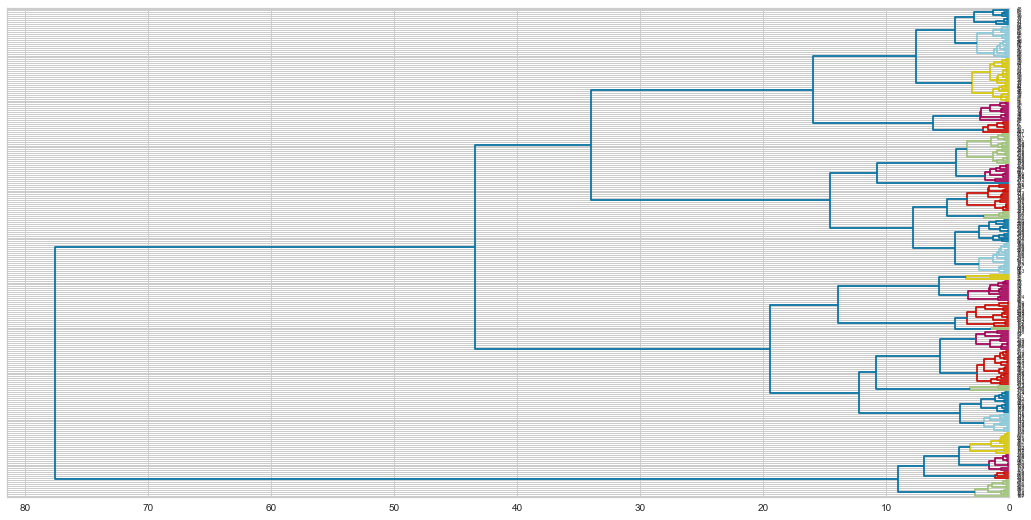

In [151]:
#générer la matrice des liens
Z = linkage(X_pca,method='ward',metric='euclidean')

#affichage du dendrogramme
plt.figure(figsize=(16, 9))
dendrogram(Z,labels=dfstd.index,orientation='left',color_threshold= 4)

plt.show()

* Notes:
    * Le CAH suggere 5 clusters, c'est vrai qu'avec 5 clusters on ne perd pas beaucoup en silhouette et on baisse encore l'inertie et c'est aussi un point d'inflexion.

## nombre de cluster = 5

In [ ]:
nbr_cluster = 5
km = KMeans(n_clusters = nbr_cluster, n_init=20, random_state=42)     
# on peut entrainer le modèle et obtenir les labels en meme temps avec fit_predict
prediction = km.fit_predict(X_pca)
prediction

## 3D

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib
nbr_cluster = len(np.unique(prediction))
colors = colors = cm.nipy_spectral(prediction/nbr_cluster)
    
ax = plt.axes(projection = "3d",)
for k in range(nbr_cluster):
    ax.scatter(X_pca[prediction == k,0], X_pca[prediction == k,1], X_pca[prediction == k,2],
               c = colors[prediction == k], s = 100, alpha=0.9, edgecolors="grey", linewidth= 1.5) 

ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], c = 'r', marker = '+', s = 100,
               alpha=0.5, linewidth= 1.5)
ax.set_xlabel("X_pca_0")
ax.set_ylabel("X_pca_1")
ax.set_zlabel("X_pca_2")
n=dfstd.shape[0]
for i in range(n):
    ax.text(X_pca[i,0], X_pca[i,1], X_pca[i,2], "%s"%(dfstd.index[i]))

Using matplotlib backend: Qt5Agg


In [67]:
%matplotlib inline

* Note: avec le 3d, on a voit une belle séparation des clusters, reste le FR,ChevretPateMolle qui est clairement un outlier et qui tire un peu.
* En réalité, c'est le cluster (anciennement 0, quand on a fait nbr_cluster = 4) qui a étét divisé en deux

In [133]:
for label in np.unique(prediction):
    print("cluster:", label)
    print("nbr_element dans le cluster:", dfstd.groupby(prediction).size()[label])
    print("davies_bouldin_score:",metrics.davies_bouldin_score(dfstd, prediction == label).round(3))
    print("liste d'individus:\n")
    idk=np.argsort(prediction)
    dfname = pd.DataFrame(dfstd.index[idk], prediction[idk])
    dfname[dfname.index == label].apply(lambda x: print(x.values))
    print("="*50)

cluster: 0
nbr_element dans le cluster: 33
davies_bouldin_score: 0.77
liste d'individus:

[108 179 177 236 143 191  80 130  83 150  85 231 230 228 151  90 192 225
 106 162 208 248 102 113 115 206 117  96 119 121 166 167 120]
cluster: 1
nbr_element dans le cluster: 65
davies_bouldin_score: 2.022
liste d'individus:

[55 56 57 58 60 61 62 63 64 67 68 69 70 73 74 75 76 77 78 65 71  0 52 26
 25 24 21 20 19 18 16 15 14 12 10  9  8  6  5  4  3  1 27 28 54 30 47 49
 46 44 43 29 41 40 39 48 38 36 35 50 33 51 32 31 37]
cluster: 2
nbr_element dans le cluster: 28
davies_bouldin_score: 1.926
liste d'individus:

[112 204 189 152 201 128 129 175 187 203 131  79  72 245   7 243  13 240
  22  34  42  45  53  59 234  82 159 104]
cluster: 3
nbr_element dans le cluster: 63
davies_bouldin_score: 2.286
liste d'individus:

[198 238 173 172 171 170 168 202 215 213 211 209 165 163 216 227 218 181
 197 195 232 233 199 200 220 194 207 190 224 222 186 182 161 205 249 158
 125 118 116 114 160 107 105 101  98  97 1

* Notes:
    * Cluster 1 et cluster4  avec un index > 2. Ces deux clusters contiennent le plus grand nombre d'individus

In [49]:
# Afficher les deux moyennes
pd.concat([df.groupby(prediction).mean(), pd.DataFrame(df.mean(),columns = ["Moyenne_totale"]).T])

,Calories,Sodium,Calcium,Retinol,Folates,Proteines,Magnesium,Prediction
0,324.500000,330.916667,136.483333,62.583333,17.316667,19.833333,20.833333,0.666667
1,377.200000,130.400000,278.980000,64.560000,3.120000,29.120000,45.400000,3.000000
2,101.750000,44.750000,133.750000,55.150000,16.475000,7.200000,11.250000,2.000000
3,276.500000,235.500000,127.200000,115.000000,34.050000,17.950000,24.250000,0.000000
4,335.500000,233.400000,212.870000,58.040000,5.570000,21.970000,28.800000,1.000000
Moyenne_totale,300.034483,210.086207,185.734483,67.562069,13.010345,20.168966,26.965517,1.275862


In [50]:
# Difference des deux moyennes
df.groupby(prediction).mean()-df.mean()

,Calories,Sodium,Calcium,Retinol,Folates,Proteines,Magnesium,Prediction
0,24.465517,120.830460,-49.251149,-4.978736,4.306322,-0.335632,-6.132184,-0.609195
1,77.165517,-79.686207,93.245517,-3.002069,-9.890345,8.951034,18.434483,1.724138
2,-198.284483,-165.336207,-51.984483,-12.412069,3.464655,-12.968966,-15.715517,0.724138
3,-23.534483,25.413793,-58.534483,47.437931,21.039655,-2.218966,-2.715517,-1.275862
4,35.465517,23.313793,27.135517,-9.522069,-7.440345,1.801034,1.834483,-0.275862


In [134]:
get_metriques(df, prediction)

,TSS,BSS,R2
AGE,7.464336e+04,1.760637e+04,0.235873
Cerne_Surface,5.907766e+11,3.580239e+11,0.606022
Cerne_Haralick_Contraste,6.698256e+02,2.653013e+02,0.396075
Cerne_Haralick_Entropie,6.086763e+01,1.767376e+01,0.290364
Cerne_Rugosite_Rt,1.107761e+05,3.261789e+04,0.294449
Cerne_Rugosite_Ra,1.997406e+03,9.633740e+02,0.482313
Cerne_Orientation_Aniso,1.294469e+03,5.673430e+01,0.043828
Cerne_H76,8.704549e+02,7.308195e+02,0.839583
Cerne_Contraste_dL,9.148962e+03,6.459148e+03,0.705998
Cerne_Contraste_da,8.712642e+02,2.395620e+02,0.274959


* Note:
    * cluster 0 et cluster 1 se distinguent des autres maintenant
    * Il faut vérifier si le clustering a du sens avec un expert métier ou une recherche sur le net
    * Je pense quand meme que le bon nombre reste 4 clusters, puisque c'est le cluster0 qui a été coupé en deux, en plus mettre le Coulommier avec le Roquefort, personnelement et sans etre un connaisseur, j ene l'aurais aps fait

# Réduire le dataset

In [52]:
# repartir sur une bonne base
df = data.copy()
df.head()

,Fromages,Calories,Sodium,Calcium,Retinol,Folates,Proteines,Magnesium
0,CarreDelEst,314,353.5,72.6,51.6,30.3,21.0,20
1,Babybel,314,238.0,209.8,63.7,6.4,22.6,27
2,Beaufort,401,112.0,259.4,54.9,1.2,26.6,41
3,Bleu,342,336.0,211.1,37.1,27.5,20.2,27
4,Camembert,264,314.0,215.9,103.0,36.4,23.4,20


In [53]:
df = df.set_index("Fromages")

In [54]:
list_fromages = ["Yaourtlaitent.nat", "Fr.Frais20nat", "Fr.Frais40nat", "PetitSuisse40"]

In [55]:
df = df.drop(labels = list_fromages, axis = 0)
df.shape

(25, 7)

In [56]:
dfstd = sc.fit_transform(df)
dfstd = pd.DataFrame(dfstd, columns = df.columns, index = df.index)
dfstd.head()

,Calories,Sodium,Calcium,Retinol,Folates,Proteines,Magnesium
Fromages,,,,,,,
CarreDelEst,-0.393814,1.305009,-1.729552,-0.725392,1.498935,-0.262805,-0.961510
Babybel,-0.393814,0.016290,0.224261,-0.236355,-0.508717,0.075208,-0.251534
Beaufort,1.535341,-1.389585,0.930596,-0.592019,-0.945528,0.920240,1.168417
Bleu,0.227064,1.109749,0.242774,-1.311429,1.263729,-0.431812,-0.251534
Camembert,-1.502523,0.864279,0.311129,1.352007,2.011348,0.244214,-0.961510


In [57]:
pca = PCA(svd_solver = "full")
X_pca = pca.fit_transform(dfstd)
print('variances expliquées:\n',pca.explained_variance_ratio_)

variances expliquées:
 [0.55861181 0.15843187 0.09961729 0.08129354 0.04475043 0.04177621
 0.01551887]


In [58]:
eigval = pca.explained_variance_
eigval

array([4.07321109, 1.15523236, 0.72637604, 0.59276537, 0.32630519,
       0.30461817, 0.11315845])

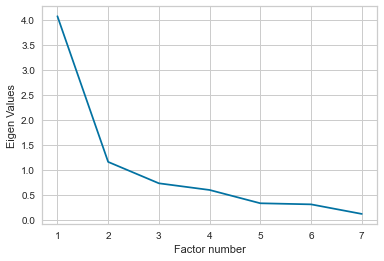

In [59]:
plt.plot(np.arange(1,df.shape[1]+1), eigval)
plt.ylabel("Eigen Values")
plt.xlabel("Factor number")
plt.show()

In [60]:
percen = 0.81
pca = PCA(n_components = percen, svd_solver = "full")
X_pca = pca.fit_transform(dfstd)
X_pca.shape
print("avec", X_pca.shape[1], "dimensions on a: ", percen *100, "% de variance expliquée")

avec 3 dimensions on a:  81.0 % de variance expliquée


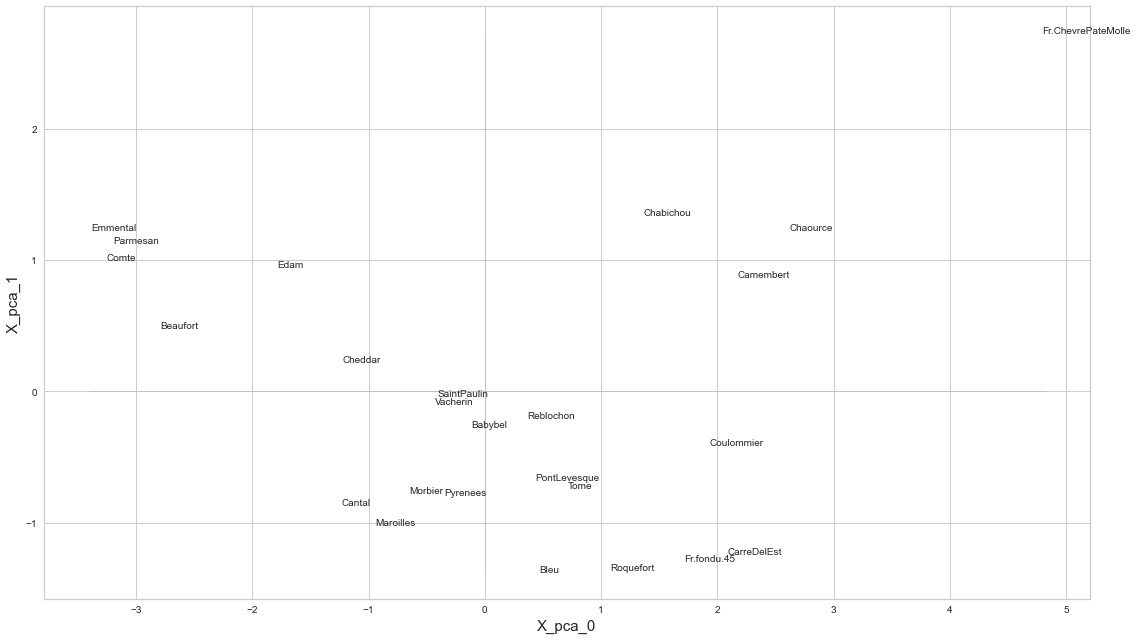

In [61]:
plot_pca(0, 1, X_pca, dfstd)

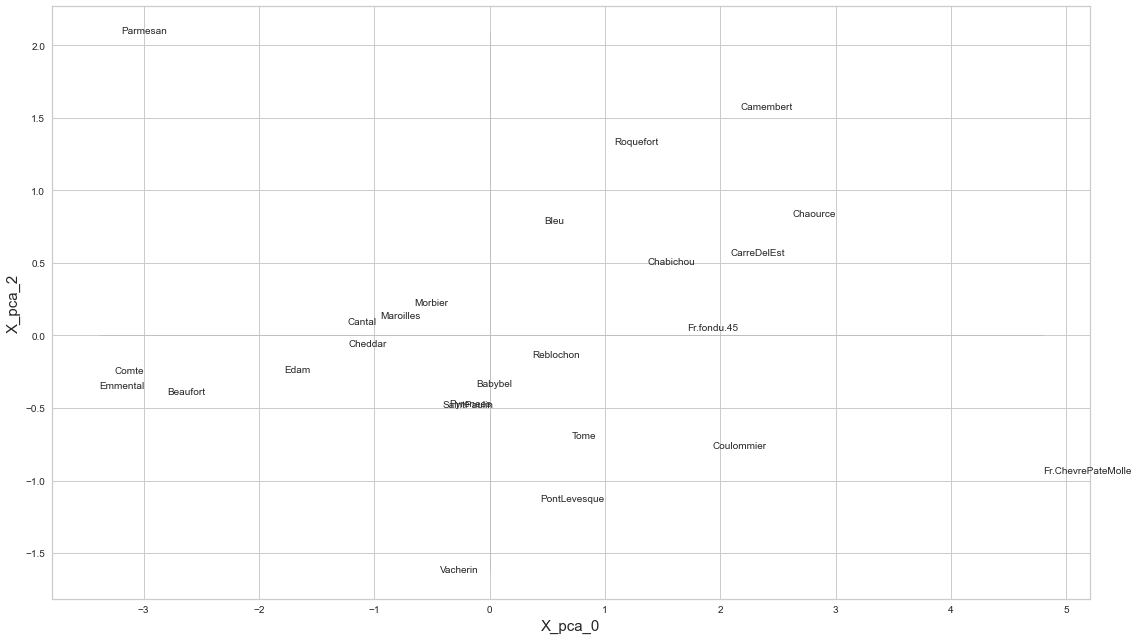

In [62]:
plot_pca(0, 2, X_pca, dfstd)

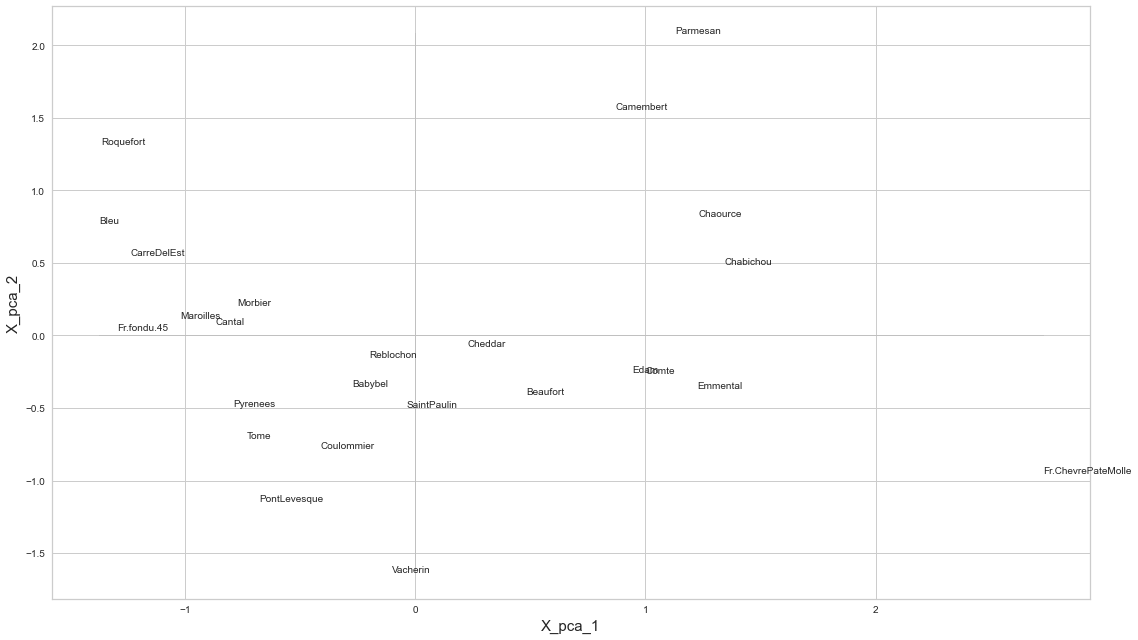

In [63]:
plot_pca(1, 2, X_pca, dfstd)

In [80]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib
ax = plt.axes(projection = "3d",)
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],  s = 100)
ax.set_xlabel("X_pca_0")
ax.set_ylabel("X_pca_1")
ax.set_zlabel("X_pca_2")
n=dfstd.shape[0]
for i in range(n):
    ax.text(X_pca[i,0], X_pca[i,1], X_pca[i,2], "%s"%(dfstd.index[i]))

Using matplotlib backend: Qt5Agg


In [81]:
%matplotlib inline

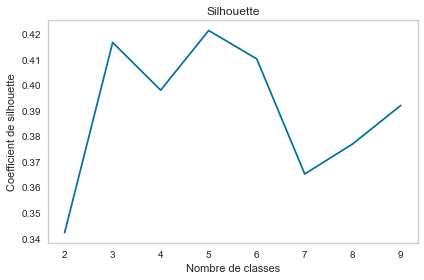

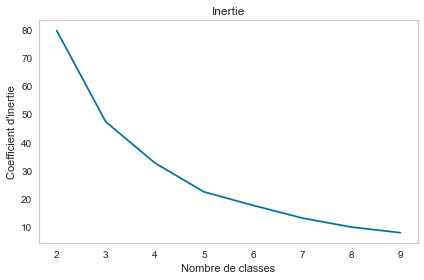

In [82]:
plot_silhouette_inertie(X_pca, range(2,10,1))

* Note: Nombre clusters = 3
* On pouvait s 'y attendre, on enlever un cluster qui était bien typé

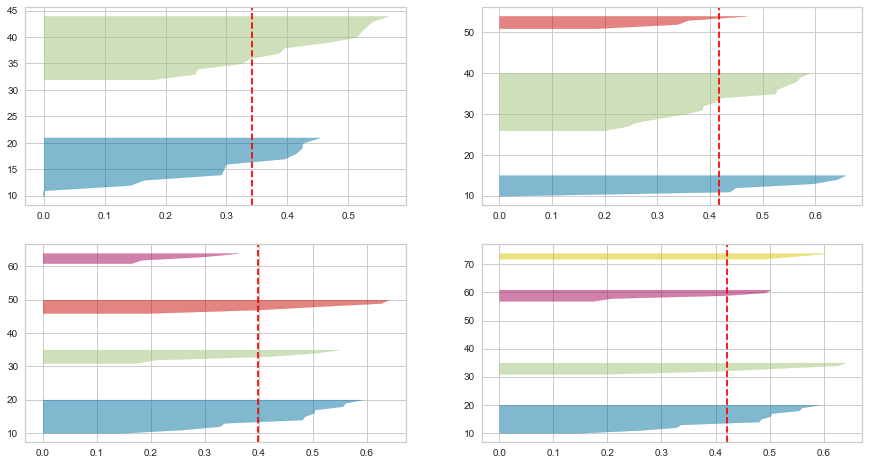

In [67]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_pca)

In [68]:
nbr_cluster = 3
km = KMeans(n_clusters = nbr_cluster, n_init=20, random_state=42)     
# on peut entrainer le modèle et obtenir les labels en meme temps avec fit_predict
prediction = km.fit_predict(X_pca)
prediction

array([1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1])

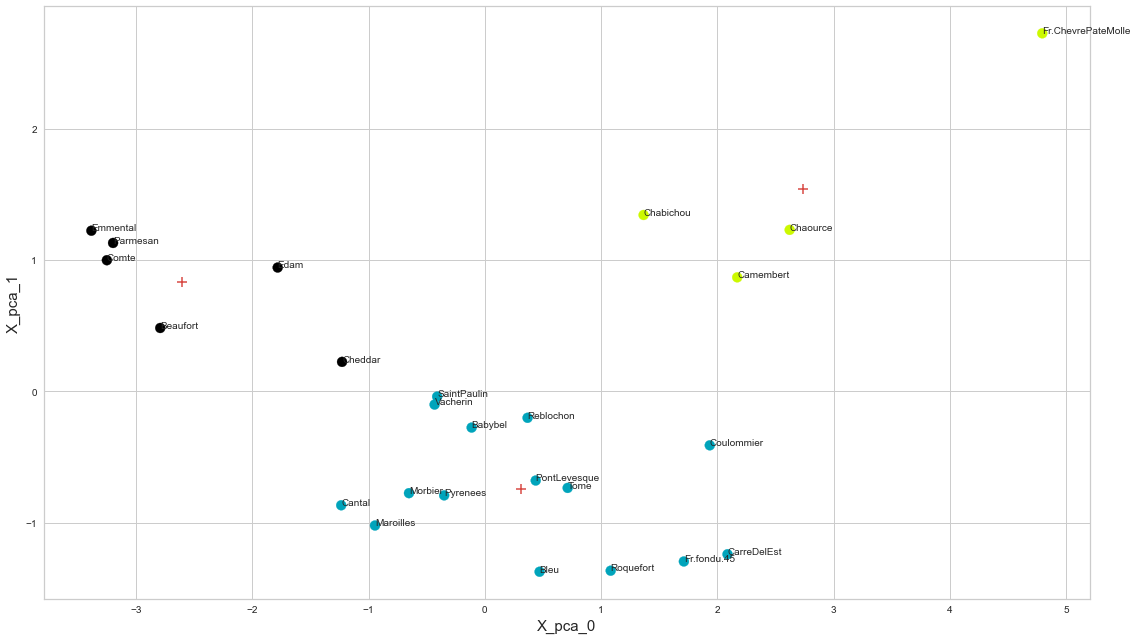

In [69]:
plot_cmpv2(0,1,X_pca,dfstd,prediction)

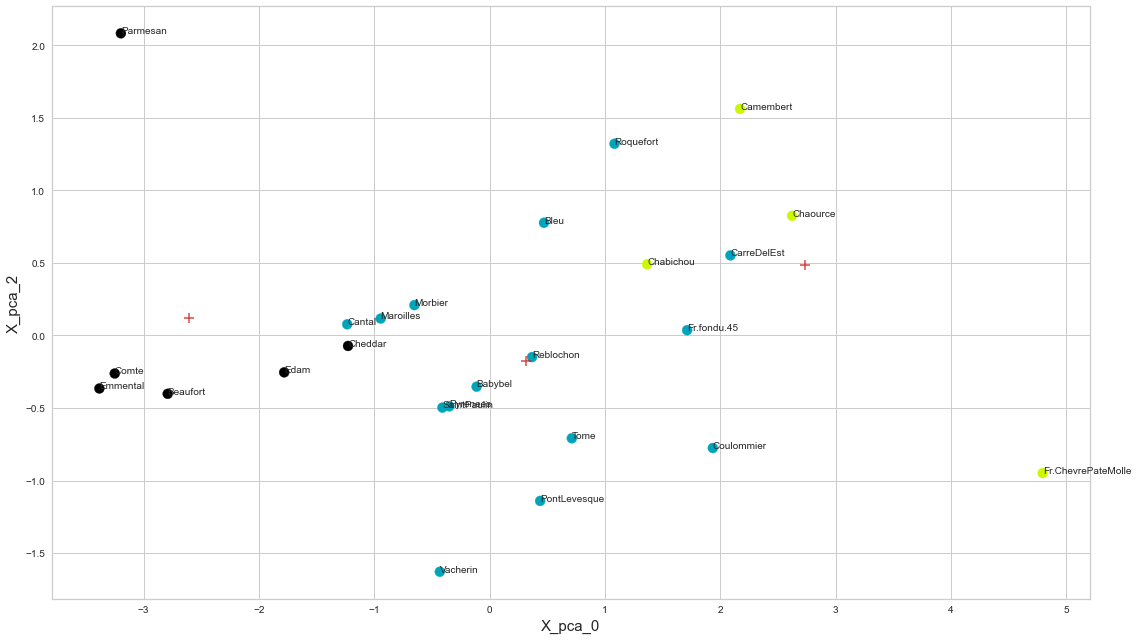

In [70]:
plot_cmpv2(0,2,X_pca,dfstd,prediction)

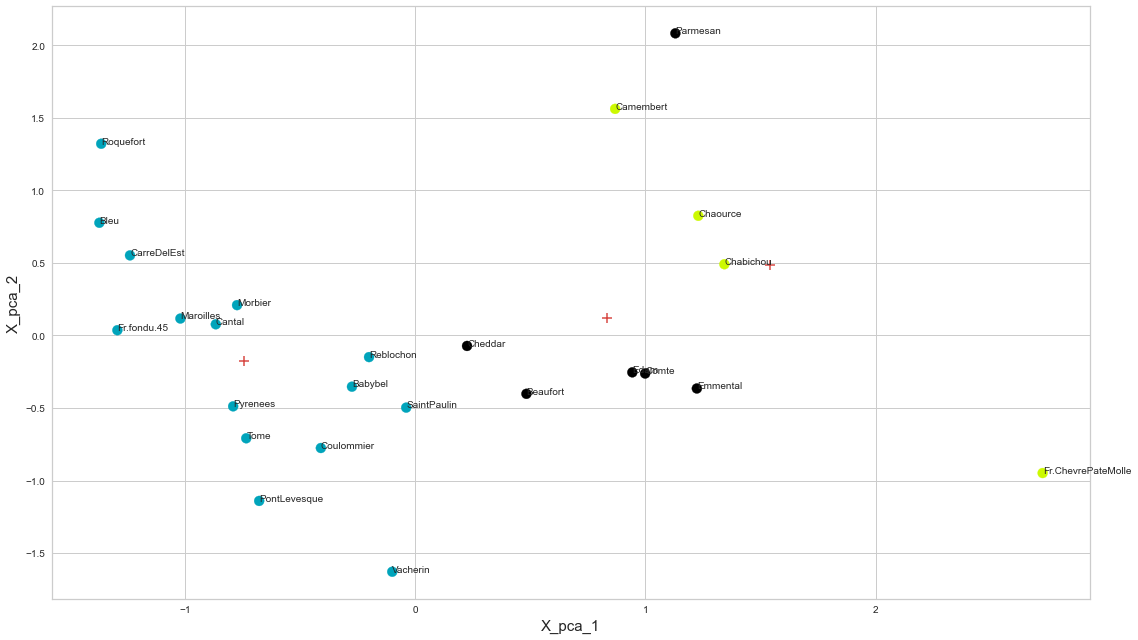

In [71]:
plot_cmpv2(1,2,X_pca,dfstd,prediction)

In [72]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib
nbr_cluster = len(np.unique(prediction))
colors = colors = cm.nipy_spectral(prediction/nbr_cluster)
    
ax = plt.axes(projection = "3d",)
for k in range(nbr_cluster):
    ax.scatter(X_pca[prediction == k,0], X_pca[prediction == k,1], X_pca[prediction == k,2],
               c = colors[prediction == k], s = 100, alpha=0.9, edgecolors="grey", linewidth= 1.5) 

ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], c = 'r', marker = '+', s = 100,
               alpha=0.5, linewidth= 1.5)
ax.set_xlabel("X_pca_0")
ax.set_ylabel("X_pca_1")
ax.set_zlabel("X_pca_2")
n=dfstd.shape[0]
for i in range(n):
    ax.text(X_pca[i,0], X_pca[i,1], X_pca[i,2], "%s"%(dfstd.index[i]))

Using matplotlib backend: Qt5Agg


In [73]:
%matplotlib inline

In [74]:
for nbr in range(nbr_cluster):
    print("cluster", nbr)
    print("score silhouette:", metrics.silhouette_score(X_pca, prediction==nbr))
    print("")


cluster 0
score silhouette: 0.39023927492216215

cluster 1
score silhouette: 0.28336531620772254

cluster 2
score silhouette: 0.3968679981450282



In [75]:
distances = km.fit_transform(X_pca)
for label in range(nbr_cluster): 
    print("cluster ", label)
    print("somme_distance:", distances[:,label].sum())
    print("")

cluster  0
somme_distance: 80.74674336710981

cluster  1
somme_distance: 53.48703157935444

cluster  2
somme_distance: 92.91661387587651



In [76]:
for label in np.unique(prediction):
    print("cluster:", label)
    print("nbr_element dans le cluster:", dfstd.groupby(prediction).size()[label])
    print("davies_bouldin_score:",metrics.davies_bouldin_score(dfstd, prediction == label).round(3))
    print("liste d'individus:\n")
    idk=np.argsort(prediction)
    dfname = pd.DataFrame(dfstd.index[idk], prediction[idk])
    dfname[dfname.index == label].apply(lambda x: print(x.values))
    print("="*50)

cluster: 0
nbr_element dans le cluster: 6
davies_bouldin_score: 1.013
liste d'individus:

['Emmental' 'Beaufort' 'Parmesan' 'Cheddar' 'Comte' 'Edam']
cluster: 1
nbr_element dans le cluster: 15
davies_bouldin_score: 2.251
liste d'individus:

['SaintPaulin' 'Roquefort' 'Reblochon' 'Pyrenees' 'PontLevesque' 'Morbier'
 'Maroilles' 'Fr.fondu.45' 'CarreDelEst' 'Tome' 'Coulommier' 'Cantal'
 'Bleu' 'Babybel' 'Vacherin']
cluster: 2
nbr_element dans le cluster: 4
davies_bouldin_score: 1.067
liste d'individus:

['Chaource' 'Chabichou' 'Camembert' 'Fr.ChevrePateMolle']


* Note: 
    * le cluster 2 contient que 3 element!
    * Fr.ChevrePateMolle est vraiment atypique, faut peut etre le supprimer du dataset ou collecter plus de fromages qui lui ressembles

In [137]:
# Afficher les deux moyennes
pd.concat([df.groupby(prediction).mean(), pd.DataFrame(df.mean(),columns = ["Moyenne_totale"]).T])

,AGE,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,Cerne_Contraste_da,...,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur,Prediction
0,53.151515,0.000000,5.173670,5.898109,116.015152,9.365776,11.745000,0.000000,0.000000,0.000000,...,60.968915,6.493488,8.735294,6.451506,202.515152,15.203788,13.503258,398202.636364,408.234227,0.000000
1,42.661538,113603.769231,4.013514,6.068846,119.407692,13.026071,10.248951,5.555800,12.164994,2.124237,...,70.614300,8.111172,7.758943,6.586508,211.253846,17.334865,12.040520,390758.500000,418.548869,1.076923
2,52.857143,92132.946429,7.012946,6.414786,128.892857,13.495704,11.111032,5.243168,15.201561,2.755482,...,58.369357,8.003225,11.769107,6.895529,202.232143,18.596382,14.881029,361320.482143,382.526321,2.000000
3,29.269841,48689.238095,3.571829,5.535979,94.039683,8.393121,11.168386,3.814687,11.694810,2.338778,...,66.808344,6.786146,7.003851,6.349179,204.634921,16.057867,12.986513,392849.650794,415.999556,1.095238
4,41.836066,43180.885246,4.803372,5.954970,113.934426,10.513305,11.011397,4.048195,16.815103,3.272861,...,59.044405,7.095448,8.712889,6.545016,208.344262,16.942362,13.375621,421604.614754,426.925910,2.000000
Moyenne_totale,41.612000,62661.694000,4.584012,5.922986,112.294000,10.814892,10.960717,3.980804,11.915450,2.248866,...,64.187520,7.303804,8.379439,6.533367,206.712000,16.777278,13.115893,396497.490000,414.554382,1.268000


In [136]:
# Difference des deux moyennes
df.groupby(prediction).mean()-df.mean()

,AGE,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,Cerne_Contraste_da,...,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur,Prediction
0,11.539515,-62661.694000,0.589658,-0.024877,3.721152,-1.449117,0.784283,-3.980804,-11.915450,-2.248866,...,-3.218605,-0.810317,0.355855,-0.081861,-4.196848,-1.573491,0.387364,1705.146364,-6.320155,-1.268000
1,1.049538,50942.075231,-0.570498,0.145860,7.113692,2.211178,-0.711766,1.574996,0.249543,-0.124629,...,6.426780,0.807368,-0.620496,0.053140,4.541846,0.557586,-1.075373,-5738.990000,3.994487,-0.191077
2,11.245143,29471.252429,2.428935,0.491800,16.598857,2.680811,0.150315,1.262364,3.286110,0.506617,...,-5.818163,0.699421,3.389668,0.362161,-4.479857,1.819104,1.765135,-35177.007857,-32.028061,0.732000
3,-12.342159,-13972.455905,-1.012183,-0.387007,-18.254317,-2.421772,0.207669,-0.166116,-0.220641,0.089912,...,2.620824,-0.517658,-1.375588,-0.184188,-2.077079,-0.719412,-0.129381,-3647.839206,1.445174,-0.172762
4,0.224066,-19480.808754,0.219361,0.031984,1.640426,-0.301587,0.050680,0.067391,4.899653,1.023995,...,-5.143115,-0.208357,0.333449,0.011649,1.632262,0.165084,0.259728,25107.124754,12.371528,0.732000


In [135]:
get_metriques(df, prediction)

,TSS,BSS,R2
AGE,7.464336e+04,1.760637e+04,0.235873
Cerne_Surface,5.907766e+11,3.580239e+11,0.606022
Cerne_Haralick_Contraste,6.698256e+02,2.653013e+02,0.396075
Cerne_Haralick_Entropie,6.086763e+01,1.767376e+01,0.290364
Cerne_Rugosite_Rt,1.107761e+05,3.261789e+04,0.294449
Cerne_Rugosite_Ra,1.997406e+03,9.633740e+02,0.482313
Cerne_Orientation_Aniso,1.294469e+03,5.673430e+01,0.043828
Cerne_H76,8.704549e+02,7.308195e+02,0.839583
Cerne_Contraste_dL,9.148962e+03,6.459148e+03,0.705998
Cerne_Contraste_da,8.712642e+02,2.395620e+02,0.274959


* La moyenne du cluster2 est plus basse que les autres
* les coeff R2 des variables ont perdu, il devient difficile de dire que maintenant ces variables peuvent expliquer ces clusters
* Il est vraiment nécessaire de collecter plus de fromages et de se tourner vers l'expert métier qui peux aider a voir un lien dans ces clusters